![](https://raw.githubusercontent.com/twhipple/dsc-capstone-project-v2-online-ds-pt-090919/master/Final_Notebook_files/chile-ski-1460786.jpg)

![](https://raw.githubusercontent.com/twhipple/dsc-capstone-project-v2-online-ds-pt-090919/master/Final_Notebook_files/polish-winter-1-1405164-1280x960.jpg)


<img src="https://raw.githubusercontent.com/twhipple/dsc-capstone-project-v2-online-ds-pt-090919/master/Final_Notebook_files/polish-winter-1-1405164-1280x960.jpg", width="200" height="400">

# Mod 5 Project - Capstone
   * Student name: THOMAS J WHIPPLE
   * Student pace: Part-time student
   * Scheduled project review date/time: FRIDAY, JULY 17, 2020, 4:00pm EST
   * Instructor name: JEFF HERMAN 
   * Blog post URL: https://medium.com/@mrtjwhipple/examining-small-ski-resort-data-3ead1f8b612a

For my data science capstone project, I was able to get four years of skier data from my local ski resort. Not only do I enjoy skiing, but thought I might be able to help out this small resort by providing some useful data analysis. All the big ski resort conglomerates have data science teams who examine a wide variety of customer data from determining most the popular ski lifts that people ride on a given day to the most sought after types of food ordered at the high mountain lodge.

A note on semantics - while the resort certainly is shared by both skiers and snowboarders, I will use the term 'skiers' to include all manner of customers who enjoy the mountain. From alpine skiers to telemarker (free-heel) skiers, mono and sit-skiers (Paraplegic and Tetraplegic skiers) to snowboarders (as well as ski bikes, which I have seen at the resort but are not allowed everywhere).

After much EDA and review of the data that was shared with me, I ended up using an Unsupervised KMeans Cluster Model. I tried to group the customers accourding to their characteristics in order to look at those who returned more than once, how far they traveled, how far in advance they ordered tickets, and what types of tickets they bought.

# Import Necessary Libraries

In [1]:
# Below are the libraries I will use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import datetime as dt

import geopy.distance

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans

import folium
from folium import plugins
from folium.plugins import MarkerCluster
from folium.plugins import HeatMap
from pywaffle import Waffle 
import seaborn as sns

# Load the Data

I was given four datasets from Magic Mountain Resort. These are the Magic Mountain online ticket sales and Liftopia.com ski ticket data collected from the last four years, 2017 - 2020. Names and other personal information was deleted for confidentiality.

In [2]:
# Liftopia data from 2017
df_2017 = pd.read_csv("Data_Folder/Online Liftopia Magic store Guest sales 10.1.16 to 4.9.17.csv")
df_2017.head()

order_id   ticket_id order_status                              product  \
0  10097099  T110733002    CANCELLED  Magic Mountain | 2 Day Lift Tickets   
1  10097099  T110733003    CANCELLED  Magic Mountain | 2 Day Lift Tickets   
2  10097104  T110733016    CANCELLED  Magic Mountain | 2 Day Lift Tickets   
3  10097104  T110733017    CANCELLED  Magic Mountain | 2 Day Lift Tickets   
4  10098733  T110735894         PAID  Magic Mountain | 1 Day Lift Tickets   

      ticket_type           store  order_date   trip_date marketing_opt_in  \
0  Youth / Senior  Magic Mountain  11/11/2016  12/31/2016              Yes   
1           Adult  Magic Mountain  11/11/2016  12/31/2016              Yes   
2  Youth / Senior  Magic Mountain  11/11/2016  12/31/2016              Yes   
3           Adult  Magic Mountain  11/11/2016  12/31/2016              Yes   
4           Adult    Liftopia.com  11/15/2016   2/16/2017               No   

     purchaser_address  ... guest_height guest_weight guest_gender  \
0  23 Jefferson Circle  ...          NaN          NaN          NaN   
1  23 Jefferson Circle  ...          NaN          NaN          NaN   
2  23 Jefferson Circle  ...          NaN          NaN          NaN   
3  23 Jefferson Circle  ...          NaN          NaN          NaN   
4                  NaN  ...          NaN          NaN          NaN   

  guest_ability_level  guest_shoe_size guest_shoe_style  guest_shoe_type  \
0                 NaN              NaN              NaN              NaN   
1                 NaN              NaN              NaN              NaN   
2                 NaN              NaN              NaN              NaN   
3                 NaN              NaN              NaN              NaN   
4                 NaN              NaN              NaN              NaN   

   guest_equipment_choice  custom_field_question  custom_field_response  
0                     NaN                    NaN                    NaN  
1                     NaN                    NaN                    NaN  
2                     NaN                    NaN                    NaN  
3                     NaN                    NaN                    NaN  
4                     NaN                    NaN                    NaN  

[5 rows x 28 columns]

In [3]:
# Check out the number of entries from 2017
df_2017.shape

(2819, 28)

In [4]:
# Liftopia data from 2018
df_2018 = pd.read_csv("Data_Folder/Online Liftopia Magic store Guest sales 10.1.17 to 4.8.18.csv")
df_2018.head()

order_id   ticket_id order_status                                product  \
0  10828862  T112041778         PAID  Magic Mountain | Freedom 4-Pack 18/19   
1  10828862  T112041779         PAID  Magic Mountain | Freedom 4-Pack 18/19   
2  10832083  T112047561         PAID  Magic Mountain | Freedom 4-Pack 18/19   
3  10836557  T112055420         PAID    Magic Mountain | 2 Day Lift Tickets   
4  10836557  T112055421         PAID    Magic Mountain | 2 Day Lift Tickets   

      ticket_type           store  order_date   trip_date marketing_opt_in  \
0           Adult  Magic Mountain   9/29/2017  10/16/2017              Yes   
1           Adult  Magic Mountain   9/29/2017  10/16/2017              Yes   
2           Adult  Magic Mountain   10/2/2017  10/16/2017               No   
3  Youth / Senior    Liftopia.com  10/13/2017  12/26/2017               No   
4           Adult    Liftopia.com  10/13/2017  12/26/2017               No   

       purchaser_address  ... guest_height guest_weight guest_gender  \
0     894 Howard Hill Rd  ...          NaN          NaN          NaN   
1     894 Howard Hill Rd  ...          NaN          NaN          NaN   
2  6180 OLD BRENTFORD CT  ...          NaN          NaN          NaN   
3                    NaN  ...          NaN          NaN          NaN   
4                    NaN  ...          NaN          NaN          NaN   

  guest_ability_level  guest_shoe_size guest_shoe_style  guest_shoe_type  \
0                 NaN              NaN              NaN              NaN   
1                 NaN              NaN              NaN              NaN   
2                 NaN              NaN              NaN              NaN   
3                 NaN              NaN              NaN              NaN   
4                 NaN              NaN              NaN              NaN   

  guest_equipment_choice  custom_field_question  custom_field_response  
0                    NaN                    NaN                    NaN  
1                    NaN                    NaN                    NaN  
2                    NaN                    NaN                    NaN  
3                    NaN                    NaN                    NaN  
4                    NaN                    NaN                    NaN  

[5 rows x 28 columns]

In [5]:
# A few more visitors in 2018
df_2018.shape

(4758, 28)

In [6]:
# Liftopia data from 2019
df_2019 = pd.read_csv("Data_Folder/Online Liftopia Magic Store Guest sales 10.1.18 to 4.7.19.xls.csv")
df_2019.head()

order_id   ticket_id order_status                                product  \
0  11714060  T113603798         PAID  Magic Mountain | Freedom 4-Pack 18/19   
1  11714060  T113603799         PAID  Magic Mountain | Freedom 4-Pack 18/19   
2  11714060  T113603800         PAID  Magic Mountain | Freedom 4-Pack 18/19   
3  11714069  T113603813         PAID  Magic Mountain | Freedom 4-Pack 18/19   
4  11714069  T113603814         PAID  Magic Mountain | Freedom 4-Pack 18/19   

  ticket_type           store order_date   trip_date marketing_opt_in  \
0      4-Pack  Magic Mountain  9/15/2018  10/16/2018              Yes   
1      4-Pack  Magic Mountain  9/15/2018  10/16/2018              Yes   
2      4-Pack  Magic Mountain  9/15/2018  10/16/2018              Yes   
3      4-Pack  Magic Mountain  9/15/2018  10/16/2018              Yes   
4      4-Pack  Magic Mountain  9/15/2018  10/16/2018              Yes   

      purchaser_address  ... guest_height guest_weight guest_gender  \
0  415 E 85th St Apt 9A  ...          NaN          NaN          NaN   
1  415 E 85th St Apt 9A  ...          NaN          NaN          NaN   
2  415 E 85th St Apt 9A  ...          NaN          NaN          NaN   
3     2944 Cambridge rd  ...          NaN          NaN          NaN   
4     2944 Cambridge rd  ...          NaN          NaN          NaN   

  guest_ability_level  guest_shoe_size guest_shoe_style  guest_shoe_type  \
0                 NaN              NaN              NaN              NaN   
1                 NaN              NaN              NaN              NaN   
2                 NaN              NaN              NaN              NaN   
3                 NaN              NaN              NaN              NaN   
4                 NaN              NaN              NaN              NaN   

  guest_equipment_choice  custom_field_question  custom_field_response  
0                    NaN                    NaN                    NaN  
1                    NaN                    NaN                    NaN  
2                    NaN                    NaN                    NaN  
3                    NaN                    NaN                    NaN  
4                    NaN                    NaN                    NaN  

[5 rows x 28 columns]

In [7]:
# The biggest year of the four datasets
df_2019.shape

(6745, 28)

In [8]:
# Liftopia data from 2020 - this data set has less since the resort closed early due to Covid-19
df_2020 = pd.read_csv("Data_Folder/Online Liftopia magic store Guests 10.1.19 to 3.15.20.csv")
df_2020.head()

order_id   ticket_id order_status                              product  \
0         NaN         NaN          NaN                                  NaN   
1  12833501.0  T115609601         PAID  Magic Mountain | 1 Day Lift Tickets   
2  12833501.0  T115609602         PAID  Magic Mountain | 1 Day Lift Tickets   
3  12833547.0  T115609703         PAID  Magic Mountain | 1 Day Lift Tickets   
4  12833547.0  T115609704         PAID  Magic Mountain | 1 Day Lift Tickets   

  ticket_type           store order_date  trip_date marketing_opt_in  \
0         NaN             NaN        NaN        NaN              NaN   
1       Adult  Magic Mountain  6/27/2019   2/2/2020               No   
2       Adult  Magic Mountain  6/27/2019   2/2/2020               No   
3       Adult  Magic Mountain  6/27/2019  1/26/2020               No   
4       Adult  Magic Mountain  6/27/2019  1/26/2020               No   

  purchaser_address  ... guest_height guest_weight guest_gender  \
0               NaN  ...          NaN          NaN          NaN   
1      21194 Rt. 22  ...          NaN          NaN          NaN   
2      21194 Rt. 22  ...          NaN          NaN          NaN   
3      21194 Rt. 22  ...          NaN          NaN          NaN   
4      21194 Rt. 22  ...          NaN          NaN          NaN   

  guest_ability_level  guest_shoe_size guest_shoe_style  guest_shoe_type  \
0                 NaN              NaN              NaN              NaN   
1                 NaN              NaN              NaN              NaN   
2                 NaN              NaN              NaN              NaN   
3                 NaN              NaN              NaN              NaN   
4                 NaN              NaN              NaN              NaN   

  guest_equipment_choice  custom_field_question  custom_field_response  
0                    NaN                    NaN                    NaN  
1                    NaN                    NaN                    NaN  
2                    NaN                    NaN                    NaN  
3                    NaN                    NaN                    NaN  
4                    NaN                    NaN                    NaN  

[5 rows x 28 columns]

In [9]:
# This year may have surpased 2019, but COVID-19 cut the ski season short
df_2020.shape

(6188, 28)

In [10]:
# Put the four datasets into one dataframe
data = pd.concat([df_2017, df_2018, df_2019, df_2020], axis=0, sort=False)
data.head()

order_id   ticket_id order_status                              product  \
0  10097099.0  T110733002    CANCELLED  Magic Mountain | 2 Day Lift Tickets   
1  10097099.0  T110733003    CANCELLED  Magic Mountain | 2 Day Lift Tickets   
2  10097104.0  T110733016    CANCELLED  Magic Mountain | 2 Day Lift Tickets   
3  10097104.0  T110733017    CANCELLED  Magic Mountain | 2 Day Lift Tickets   
4  10098733.0  T110735894         PAID  Magic Mountain | 1 Day Lift Tickets   

      ticket_type           store  order_date   trip_date marketing_opt_in  \
0  Youth / Senior  Magic Mountain  11/11/2016  12/31/2016              Yes   
1           Adult  Magic Mountain  11/11/2016  12/31/2016              Yes   
2  Youth / Senior  Magic Mountain  11/11/2016  12/31/2016              Yes   
3           Adult  Magic Mountain  11/11/2016  12/31/2016              Yes   
4           Adult    Liftopia.com  11/15/2016   2/16/2017               No   

     purchaser_address  ... guest_height guest_weight guest_gender  \
0  23 Jefferson Circle  ...          NaN          NaN          NaN   
1  23 Jefferson Circle  ...          NaN          NaN          NaN   
2  23 Jefferson Circle  ...          NaN          NaN          NaN   
3  23 Jefferson Circle  ...          NaN          NaN          NaN   
4                  NaN  ...          NaN          NaN          NaN   

  guest_ability_level  guest_shoe_size guest_shoe_style  guest_shoe_type  \
0                 NaN              NaN              NaN              NaN   
1                 NaN              NaN              NaN              NaN   
2                 NaN              NaN              NaN              NaN   
3                 NaN              NaN              NaN              NaN   
4                 NaN              NaN              NaN              NaN   

  guest_equipment_choice  custom_field_question  custom_field_response  
0                    NaN                    NaN                    NaN  
1                    NaN                    NaN                    NaN  
2                    NaN                    NaN                    NaN  
3                    NaN                    NaN                    NaN  
4                    NaN                    NaN                    NaN  

[5 rows x 28 columns]

In [11]:
# Reset the index after the merge
data.reset_index(drop=True, inplace=True)

In [12]:
# See all four years combined
data.shape

(20510, 28)

# EDA

In [13]:
# Most of the data is categorical
data.describe()

order_id  net_rate_revenue  barcode  guest_height  guest_weight  \
count  2.050900e+04      20506.000000      0.0   1358.000000   1358.000000   
mean   1.223341e+07         51.058487      NaN     66.582474    150.027982   
std    1.151902e+06         24.027872      NaN      5.618835     42.383039   
min    1.009710e+07          1.860000      NaN     43.000000     36.000000   
25%    1.131234e+07         37.390000      NaN     64.000000    121.000000   
50%    1.217216e+07         47.420000      NaN     67.000000    150.000000   
75%    1.324507e+07         57.650000      NaN     71.000000    180.000000   
max    1.428648e+07        261.320000      NaN     82.000000    331.000000   

       guest_shoe_size  
count      1358.000000  
mean          8.990795  
std           2.247431  
min           1.000000  
25%           7.500000  
50%           9.000000  
75%          10.500000  
max          14.500000

In [14]:
# Total of 28 columns
data.columns

Index(['order_id', 'ticket_id', 'order_status', 'product', 'ticket_type',
       'store', 'order_date', 'trip_date', 'marketing_opt_in',
       'purchaser_address', 'purchaser_city', 'purchaser_state',
       'purchaser_zip', 'purchaser_country', 'net_rate_revenue', 'currency',
       'barcode', 'guest_birthdate', 'guest_height', 'guest_weight',
       'guest_gender', 'guest_ability_level', 'guest_shoe_size',
       'guest_shoe_style', 'guest_shoe_type', 'guest_equipment_choice',
       'custom_field_question', 'custom_field_response'],
      dtype='object')

In [15]:
# 20,509 rows with lots of missing data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20510 entries, 0 to 20509
Data columns (total 28 columns):
order_id                  20509 non-null float64
ticket_id                 20509 non-null object
order_status              20509 non-null object
product                   20509 non-null object
ticket_type               20509 non-null object
store                     20509 non-null object
order_date                20509 non-null object
trip_date                 20509 non-null object
marketing_opt_in          20509 non-null object
purchaser_address         14222 non-null object
purchaser_city            19822 non-null object
purchaser_state           19755 non-null object
purchaser_zip             19819 non-null object
purchaser_country         19798 non-null object
net_rate_revenue          20506 non-null float64
currency                  20509 non-null object
barcode                   0 non-null float64
guest_birthdate           1358 non-null object
guest_height              135

In [16]:
# All the columns that don't have enough information - going to drop these:
guest_data = ['barcode', 'guest_birthdate', 'guest_height', 'guest_weight', 
              'guest_gender', 'guest_ability_level', 'guest_shoe_size',
              'guest_shoe_style', 'guest_shoe_type', 'guest_equipment_choice',
              'custom_field_question', 'custom_field_response']
df = data.drop(columns = guest_data, axis=0)                
df.head()         

order_id   ticket_id order_status                              product  \
0  10097099.0  T110733002    CANCELLED  Magic Mountain | 2 Day Lift Tickets   
1  10097099.0  T110733003    CANCELLED  Magic Mountain | 2 Day Lift Tickets   
2  10097104.0  T110733016    CANCELLED  Magic Mountain | 2 Day Lift Tickets   
3  10097104.0  T110733017    CANCELLED  Magic Mountain | 2 Day Lift Tickets   
4  10098733.0  T110735894         PAID  Magic Mountain | 1 Day Lift Tickets   

      ticket_type           store  order_date   trip_date marketing_opt_in  \
0  Youth / Senior  Magic Mountain  11/11/2016  12/31/2016              Yes   
1           Adult  Magic Mountain  11/11/2016  12/31/2016              Yes   
2  Youth / Senior  Magic Mountain  11/11/2016  12/31/2016              Yes   
3           Adult  Magic Mountain  11/11/2016  12/31/2016              Yes   
4           Adult    Liftopia.com  11/15/2016   2/16/2017               No   

     purchaser_address purchaser_city purchaser_state purchaser_zip  \
0  23 Jefferson Circle        Clinton              CT          6413   
1  23 Jefferson Circle        Clinton              CT          6413   
2  23 Jefferson Circle        Clinton              CT          6413   
3  23 Jefferson Circle        Clinton              CT          6413   
4                  NaN       Guilford              VT          5301   

  purchaser_country  net_rate_revenue currency  
0                US             50.21      USD  
1                US             69.74      USD  
2     United States             50.21      USD  
3     United States             69.74      USD  
4     United States             19.54      USD

### Guest Data

I am going to start by looking at all the columns that I plan to drop - just to make sure that there isn't anything there that might be useful. Plus, it will give me some ideas for areas that could be explored if I had a more compete dataset. Keep in mind that there are only 1358 rows of the 20509 or about 6.6% of the data in these features and they will get dropped as soon as I'm done here.

In [17]:
# I imagine that the majority of experienced skiers don't enter this info.
data.guest_ability_level.value_counts()

Beginner                  646
Intermediate              541
Advanced                  120
Type I (Beginner)          34
Type II (Intermediate)     13
Type III (Advanced)         4
Name: guest_ability_level, dtype: int64

In [18]:
# This information is probably for rental equipment and entry-level skiers
data.guest_equipment_choice.value_counts()

Skis                             1134
Snowboard: Left Foot Forward      143
Snowboard: Right Foot Forward      81
Name: guest_equipment_choice, dtype: int64

### Guest Age

In [19]:
# Again, keep in mind I have less than 7% of birthdates from the dataset
data.guest_birthdate.count()

1358

In [20]:
# Create a new df for age to do some exploring
age = data.filter(['guest_birthdate', 'trip_date'], axis=1)

In [21]:
# Lots of missing data here as well
age.head()

guest_birthdate   trip_date
0             NaN  12/31/2016
1             NaN  12/31/2016
2             NaN  12/31/2016
3             NaN  12/31/2016
4             NaN   2/16/2017

In [22]:
# Convert both dates to datetime
age['guest_birthdate'] = pd.to_datetime(age['guest_birthdate'])
age['trip_date'] = pd.to_datetime(age['trip_date'])

In [23]:
# Drop the missing values
age = age.dropna()

In [24]:
# Check out the age df
age.head()

guest_birthdate  trip_date
2849      1995-04-25 2018-01-20
2864      1968-08-29 2018-01-13
2895      1969-12-17 2018-01-13
2896      1971-02-01 2018-01-13
2897      2000-09-16 2018-01-13

In [25]:
# What is the mean birthdate?
age.guest_birthdate.mean()

Timestamp('1990-04-03 14:10:25.625920512')

In [26]:
# Now I want to figure out how old they are and create a new column
age['years_old'] = (age['trip_date'] - age['guest_birthdate'])

In [27]:
# Change this datetime value to years 'Y'
age['years_old'] = round((age['years_old']/np.timedelta64(1,'Y')), 2)

In [28]:
# Look at the new column
age.head()

guest_birthdate  trip_date  years_old
2849      1995-04-25 2018-01-20      22.74
2864      1968-08-29 2018-01-13      49.38
2895      1969-12-17 2018-01-13      48.07
2896      1971-02-01 2018-01-13      46.95
2897      2000-09-16 2018-01-13      17.33

In [29]:
# Not sure why there are negative ages?
age.years_old.describe()

count    1358.000000
mean       28.828380
std        14.263594
min        -0.640000
25%        17.552500
50%        26.340000
75%        38.617500
max        77.780000
Name: years_old, dtype: float64

In [30]:
# Guess some people must have just put in a random date
age[age.years_old < 0]

guest_birthdate  trip_date  years_old
5174       2018-10-08 2018-02-17      -0.64
5441       2018-04-30 2018-02-19      -0.19
7178       2018-05-26 2018-03-22      -0.18
7179       2018-10-12 2018-03-22      -0.56
18785      2020-07-18 2020-02-17      -0.42

In [31]:
# Get rid of all those negatives or fill with the mean?
age = age[age.years_old > 0] 

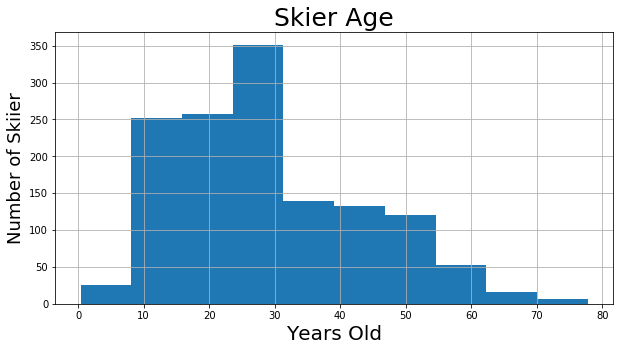

In [32]:
# Get a visual of ages
age.years_old.hist(figsize=(10,5))
plt.ylabel("Number of Skiier",fontsize=18)
plt.xlabel("Years Old", fontsize=20)
plt.title('Skier Age', fontsize=25)
plt.show()

In [33]:
# Age stats
age.years_old.describe()

count    1353.000000
mean       28.936386
std        14.178567
min         0.370000
25%        17.690000
50%        26.390000
75%        38.650000
max        77.780000
Name: years_old, dtype: float64

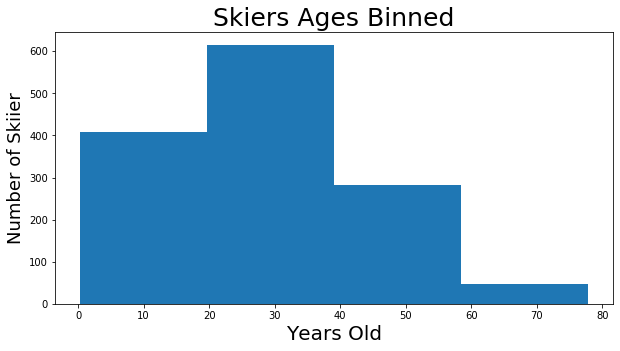

In [34]:
# Thought I'd look at ages in terms of groups
age.years_old.hist(bins=4, grid=False, figsize=(10,5))
plt.ylabel("Number of Skiier",fontsize=18)
plt.xlabel("Years Old", fontsize=20)
plt.title('Skiers Ages Binned', fontsize=25)
plt.show()

***While this data analysis may not be representative of the whole dataset, it's still interesting -
though it may also be similar to the age demographics for all the USA in general as opposed to a subset of age groups for the skiers at this resort. I believe that the average age of many of the major resorts has been decreasing due to the growing number of very young skier, along with added ski school operations, an increase in availability for kid-sized rental equipment, clothing, and gear.***

### Form Fillers

What percent of the skiers who fill in the birthdate info have been to the resort more than once?

In [35]:
# Create a groupby based on trip_date and guest_birthdate
form_fillers = data.groupby('purchaser_address')['trip_date', 'guest_birthdate'].nunique()

In [36]:
# Check out the total number of visitors
form_fillers.describe()

trip_date  guest_birthdate
count  5842.000000      5842.000000
mean      1.244094         0.182814
std       0.737844         0.612146
min       1.000000         0.000000
25%       1.000000         0.000000
50%       1.000000         0.000000
75%       1.000000         0.000000
max      13.000000         7.000000

In [37]:
# How many of them returned more than once?
form_fillers_who_returned = form_fillers[(form_fillers.trip_date > 1)]

In [38]:
# Make sure it looks good
form_fillers_who_returned.describe()

trip_date  guest_birthdate
count  907.000000       907.000000
mean     2.572216         0.210584
std      1.191406         0.703804
min      2.000000         0.000000
25%      2.000000         0.000000
50%      2.000000         0.000000
75%      3.000000         0.000000
max     13.000000         7.000000

In [39]:
# What percent of skiers made more than one visit to the mountain in the past 4 years?
return_skiers = len(form_fillers_who_returned)/len(form_fillers)*100
print('Percent of skiers who returned more than once:', round(return_skiers, 2),'%')

Percent of skiers who returned more than once: 15.53 %


In [40]:
# Filter out those who filled in the birthdate column
form_fillers_with_age = form_fillers_who_returned[form_fillers_who_returned.guest_birthdate != 0]

In [41]:
# How many were there?
form_fillers_with_age.describe()

trip_date  guest_birthdate
count  105.000000       105.000000
mean     2.533333         1.819048
std      1.000641         1.166693
min      2.000000         1.000000
25%      2.000000         1.000000
50%      2.000000         1.000000
75%      3.000000         2.000000
max      6.000000         7.000000

In [42]:
# Find the percent out of total who returned
fillers_with_age = len(form_fillers_with_age)/len(form_fillers_who_returned)*100
print('Percent of skiers who returned more than once and filled in birthdate:',
     round(fillers_with_age, 2),'%')

Percent of skiers who returned more than once and filled in birthdate: 11.58 %


## Country

In [43]:
# Check out the different countries where people come from to ski
df['purchaser_country'].value_counts()

US               17374
United States     2303
CA                  41
GB                  26
Canada               8
AU                   7
SE                   5
DK                   5
DO                   4
Australia            4
PR                   4
DE                   3
Brazil               3
NO                   3
NL                   2
Denmark              2
Other                2
BR                   2
Name: purchaser_country, dtype: int64

In [44]:
# We don't need the USA twice!
df['purchaser_country'].replace(to_replace='United States', value='US', inplace=True)

In [45]:
# Check to see if it worked.
df['purchaser_country'].value_counts()

US           19677
CA              41
GB              26
Canada           8
AU               7
DK               5
SE               5
DO               4
PR               4
Australia        4
Brazil           3
DE               3
NO               3
Denmark          2
Other            2
BR               2
NL               2
Name: purchaser_country, dtype: int64

In [46]:
# What are these other places?
# CA is Candada, GB looks like Great Britian... Europe
df.loc[df['purchaser_country'] == 'Other']

order_id   ticket_id order_status  \
5  10099851.0  T110737788    CANCELLED   
6  10099851.0  T110737789    CANCELLED   

                                       product ticket_type           store  \
5  Magic Mountain | 1 Day Lift Ticket + Rental       Adult  Magic Mountain   
6  Magic Mountain | 1 Day Lift Ticket + Rental       Adult  Magic Mountain   

   order_date trip_date marketing_opt_in          purchaser_address  \
5  11/17/2016  1/5/2017              Yes  30 Victoria Gardens South   
6  11/17/2016  1/5/2017              Yes  30 Victoria Gardens South   

  purchaser_city purchaser_state purchaser_zip purchaser_country  \
5   Diego Martin           Other             0             Other   
6   Diego Martin           Other             0             Other   

   net_rate_revenue currency  
5             48.35      USD  
6             48.35      USD

In [47]:
# Get rid of everything that isn't USA
df = df[df['purchaser_country'] == 'US']

In [48]:
# See if it worked
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19677 entries, 0 to 20509
Data columns (total 16 columns):
order_id             19677 non-null float64
ticket_id            19677 non-null object
order_status         19677 non-null object
product              19677 non-null object
ticket_type          19677 non-null object
store                19677 non-null object
order_date           19677 non-null object
trip_date            19677 non-null object
marketing_opt_in     19677 non-null object
purchaser_address    14111 non-null object
purchaser_city       19675 non-null object
purchaser_state      19608 non-null object
purchaser_zip        19672 non-null object
purchaser_country    19677 non-null object
net_rate_revenue     19677 non-null float64
currency             19677 non-null object
dtypes: float64(2), object(14)
memory usage: 2.6+ MB


***I decided to only deal with only the customers from the US since the address and zip code information will be easier to find. As well, the number of non-US skiers is a pretty small percent.***

## Other Columns

In [49]:
# What is the Order ID and is it important?
df['order_id'].value_counts()

11006409.0    11
10511636.0     9
10485804.0     9
14046002.0     9
10151249.0     9
              ..
11181119.0     1
14065118.0     1
11443644.0     1
12589735.0     1
11456077.0     1
Name: order_id, Length: 10876, dtype: int64

In [50]:
# Looks like some people make multiple orders, for groups maybe
df[df['order_id'] == 11006409.0].head()

order_id   ticket_id order_status  \
3345  11006409.0  T112358047         PAID   
3346  11006409.0  T112358048         PAID   
3347  11006409.0  T112358049         PAID   
3348  11006409.0  T112358050         PAID   
3349  11006409.0  T112358051         PAID   

                                  product     ticket_type           store  \
3345  Magic Mountain | 1 Day Lift Tickets           Adult  Magic Mountain   
3346  Magic Mountain | 1 Day Lift Tickets           Adult  Magic Mountain   
3347  Magic Mountain | 1 Day Lift Tickets           Adult  Magic Mountain   
3348  Magic Mountain | 1 Day Lift Tickets  Youth / Senior  Magic Mountain   
3349  Magic Mountain | 1 Day Lift Tickets  Youth / Senior  Magic Mountain   

      order_date   trip_date marketing_opt_in purchaser_address  \
3345  12/26/2017  12/27/2017               No         37 Brooks   
3346  12/26/2017  12/27/2017               No         37 Brooks   
3347  12/26/2017  12/27/2017               No         37 Brooks   
3348  12/26/2017  12/27/2017               No         37 Brooks   
3349  12/26/2017  12/27/2017               No         37 Brooks   

     purchaser_city purchaser_state purchaser_zip purchaser_country  \
3345     New Canaan              CT          6840                US   
3346     New Canaan              CT          6840                US   
3347     New Canaan              CT          6840                US   
3348     New Canaan              CT          6840                US   
3349     New Canaan              CT          6840                US   

      net_rate_revenue currency  
3345             50.21      USD  
3346             50.21      USD  
3347             50.21      USD  
3348             39.98      USD  
3349             39.98      USD

In [51]:
# And Ticket ID?
df['ticket_id'].value_counts()

T114417872    1
T116115292    1
T114383721    1
T116487324    1
T112240860    1
             ..
T113345354    1
T113817529    1
T111734248    1
T117957685    1
T116577548    1
Name: ticket_id, Length: 19677, dtype: int64

In [52]:
# Since all are unique they don't seem important
df = df.drop(['ticket_id'], axis = 1)

In [53]:
# Order Status is very lobsided. Not sure yet if I am going to drop it.
df['order_status'].value_counts()

PAID         19189
CANCELLED      488
Name: order_status, dtype: int64

## Product Types

In [54]:
# Not sure of the difference between Magic and Liftopia
df['store'].value_counts()

Magic Mountain    14118
Liftopia.com       5559
Name: store, dtype: int64

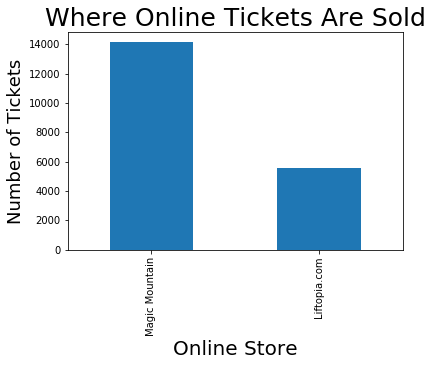

In [55]:
df['store'].value_counts().plot(kind='bar')
plt.ylabel("Number of Tickets",fontsize=18)
plt.xlabel("Online Store", fontsize=20)
plt.title('Where Online Tickets Are Sold', fontsize=25)
plt.show()
# Or like this:
#df.groupby('store').size().plot(kind='bar')

***After doing some research I discovered that the resort uses an online sales platform through their Magic Mountain website. This information is conveniently stored on the Liftopia.com website where tickets are also sold by the outside vender. About three quarters of online business comes directly from the mountain website. Liftopia.com is a popular discount lift ticket marketplace for ski/snowboard resorts across the country, though the resort looses a percentage for this service.***

In [56]:
# Look at the different possible products
df['product'].value_counts()

Magic Mountain | 1 Day Lift Tickets                                          14651
Magic Mountain | 2 Day Lift Tickets                                           1915
Magic Mountain | 1 Day Lift Ticket + Rental                                   1170
Magic Mountain | All Day Tubing                                                761
Magic Mountain | 3 Day Lift Tickets                                            417
Magic Mountain | 2 Day Lift Ticket + Rental                                    362
Magic Mountain | 1 Day Lift Ticket + Tubing                                    258
Magic Mountain | 3 Day Lift Ticket + Rental                                     45
Magic Mountain | 2019/20 Freedom 4-Pack                                         36
Magic Mountain | Freedom 4-Pack 18/19                                           36
Magic Mountain | Winter 19-20 Single Day Flexible Tickets | Valid Any Day       17
Magic Mountain | Winter 18-19 Single Day Flexible Tickets | Valid Any Day        9
Name

***Looks like single day lift tickets are far and away the most common.***

In [57]:
# Total number of rentals bought with tickets
rentals = df[(df['product'] == 'Magic Mountain | 1 Day Lift Ticket + Rental') |
             (df['product'] == 'Magic Mountain | 2 Day Lift Ticket + Rental') |
             (df['product'] == 'Magic Mountain | 3 Day Lift Ticket + Rental')].count()

In [58]:
# Rentals as a percent
print("Total percent of online rentals bought", 
      round(rentals['product']/len(df['product'])*100,2),'%')

Total percent of online rentals bought 8.01 %


In [59]:
# Check out Ticket Types
df['ticket_type'].value_counts()

Adult             13873
Youth / Senior     4976
All Ages            761
4-Pack               67
Name: ticket_type, dtype: int64

In [60]:
# Percent of tickets
adult_tic = df[df.ticket_type == 'Adult']
youth_tic = df[df.ticket_type == 'Youth / Senior']
print('Adult tickets purchased:', round(len(adult_tic)/len(df)*100,2),'%')
print('Youth/Senior tickets:', round(len(youth_tic)/len(df)*100,2),'%')

Adult tickets purchased: 70.5 %
Youth/Senior tickets: 25.29 %


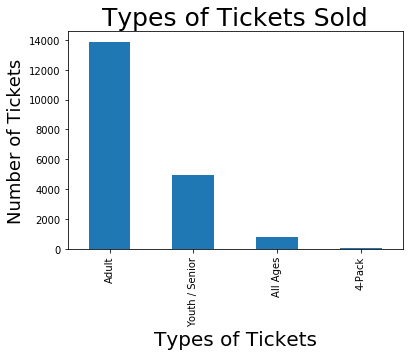

In [61]:
# Graph Ticket Types - looks like it's mostly adults
df['ticket_type'].value_counts().plot(kind="bar")
plt.ylabel("Number of Tickets",fontsize=18)
plt.xlabel("Types of Tickets", fontsize=20)
plt.title('Types of Tickets Sold', fontsize=25)
plt.show()

***I would love to have Youth and Senior tickets broken up into two separate categories. Not sure why they even have an 'All Ages' group or how much these tickets cost.***

## Ticket Time

#### Order Time

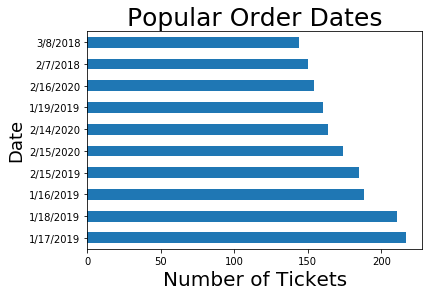

In [62]:
# When are people 'thinking' and 'planning' their ski trips?
df['order_date'].value_counts()[0:10].plot(kind='barh')
plt.ylabel("Date",fontsize=18)
plt.xlabel("Number of Tickets", fontsize=20)
plt.title('Popular Order Dates', fontsize=25)
plt.show()

***Looks like MLK Weekend, Presidents Day Weekend, Feburary Break - again, the resort
probably already knows what the busy weekends are going to be based on past conditions.***

#### Trip Time

In [63]:
# Not in datetime format.
df['trip_date'].value_counts()

1/20/2019     472
2/15/2020     383
2/16/2020     357
1/19/2019     348
1/19/2020     344
             ... 
12/18/2016      2
12/6/2016       2
12/17/2016      2
3/30/2017       1
3/2/2017        1
Name: trip_date, Length: 298, dtype: int64

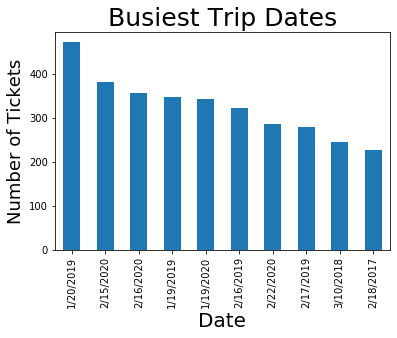

In [64]:
# What are the busiest dates?
df['trip_date'].value_counts()[0:10].plot(kind='bar')
plt.ylabel("Number of Tickets",fontsize=18)
plt.xlabel("Date", fontsize=20)
#plt.xticks(rotation=45)
plt.title('Busiest Trip Dates', fontsize=25)
plt.show()

***Looks pretty similar to when people are ordering tickets***

#### Order Trip Time Difference

In [65]:
# Change date types to datetime %Y-%m-%d
df['order_date'] = pd.to_datetime(df['order_date'])
df['trip_date'] = pd.to_datetime(df['trip_date'])

In [66]:
# Check to see if it worked
df['trip_date'].head()

0   2016-12-31
1   2016-12-31
2   2016-12-31
3   2016-12-31
4   2017-02-16
Name: trip_date, dtype: datetime64[ns]

In [67]:
# Create new column with the difference between order date and ticket date
df['order_to_trip_days'] = (df['trip_date'] - df['order_date']).dt.days

In [68]:
# Look at these stats
df['order_to_trip_days'].describe()

count    19677.000000
mean         7.524928
std         16.735216
min          0.000000
25%          1.000000
50%          2.000000
75%          6.000000
max        227.000000
Name: order_to_trip_days, dtype: float64

In [69]:
# Check out different percentiles
print("80th percentile of order_to_trip_days: ", 
      np.percentile(df['order_to_trip_days'], 80)) 

80th percentile of order_to_trip_days:  7.0


In [70]:
# Create a new df to play with this difference
difference = df['order_to_trip_days']

In [71]:
# Look for three standard deviations above the mean
diff_outliers = difference.mean() + 3*difference.std()
# Count how many rows are outliers
print("Number of outliers:", (difference > diff_outliers).sum())
# Remove outliers from the data
difference = difference[difference < diff_outliers]
difference.describe()

Number of outliers: 492


count    19185.000000
mean         5.315559
std          8.102662
min          0.000000
25%          1.000000
50%          2.000000
75%          5.000000
max         57.000000
Name: order_to_trip_days, dtype: float64

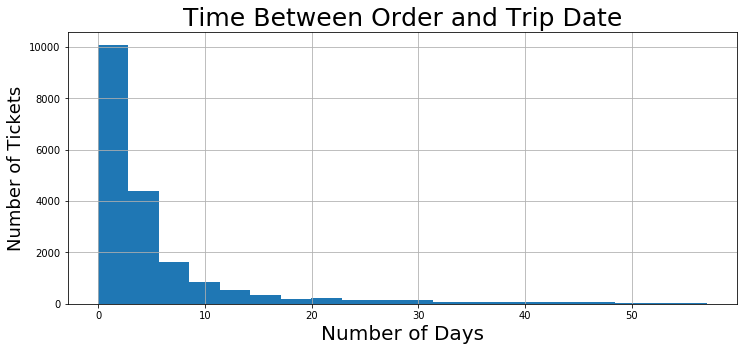

In [72]:
# Looks like most people buy tickets 1 or 2 days before they go skiing.
difference.hist(figsize =(12,5), bins=20)
plt.ylabel("Number of Tickets",fontsize=18)
plt.xlabel("Number of Days", fontsize=20)
plt.title('Time Between Order and Trip Date', fontsize=25)
plt.show()

***So most people order their tickets a day or two before - probably depending on the 
amount of snowfall and conditions. I also explored the difference between people who buy tickets through Liftopia.com and the mountain directly, but it didn't seem like it mattered since their median times were similar.***

## Zip Code

In [73]:
# Some of the zip codes are written with the extra four digits
df['purchaser_zip'][25:35]

30          7063
31    01053-9100
32    01053-9100
33         33837
34         33837
35         33837
36         33837
37         33837
38         33837
39          5253
Name: purchaser_zip, dtype: object

In [74]:
# Look at the different zip codes
df['purchaser_zip'].value_counts()

6824     194
6443     182
6424     166
5301     113
6084     111
        ... 
1879       1
18704      1
11717      1
45377      1
78333      1
Name: purchaser_zip, Length: 2575, dtype: int64

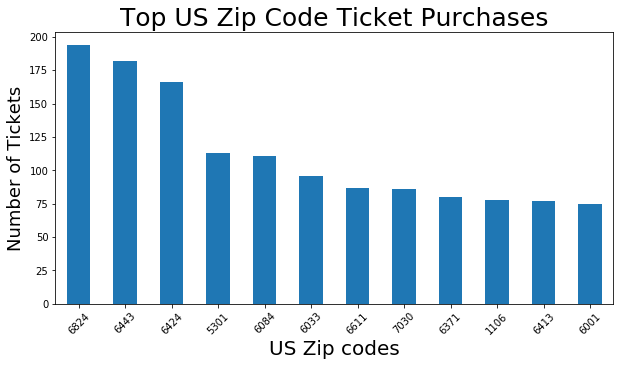

In [75]:
# Top ten zip codes where skiiers come from
df['purchaser_zip'].value_counts()[:12].plot(kind='bar', figsize=(10,5))
plt.ylabel("Number of Tickets",fontsize=18)
plt.xlabel("US Zip codes", fontsize=20)
plt.title('Top US Zip Code Ticket Purchases', fontsize=25)
plt.xticks(rotation=45)
plt.show()

***Most of these zip codes are in Connecticut, Mass, and New York!***

In [76]:
# There are some missing zip codes!
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19677 entries, 0 to 20509
Data columns (total 16 columns):
order_id              19677 non-null float64
order_status          19677 non-null object
product               19677 non-null object
ticket_type           19677 non-null object
store                 19677 non-null object
order_date            19677 non-null datetime64[ns]
trip_date             19677 non-null datetime64[ns]
marketing_opt_in      19677 non-null object
purchaser_address     14111 non-null object
purchaser_city        19675 non-null object
purchaser_state       19608 non-null object
purchaser_zip         19672 non-null object
purchaser_country     19677 non-null object
net_rate_revenue      19677 non-null float64
currency              19677 non-null object
order_to_trip_days    19677 non-null int64
dtypes: datetime64[ns](2), float64(2), int64(1), object(11)
memory usage: 2.6+ MB


In [77]:
df.purchaser_zip.isna().sum()

5

In [78]:
# First I need to get rid of the NaN's and nine digit zip codes
df.dropna(subset=['purchaser_zip'], inplace=True)

In [79]:
# Split the zip codes and get rid of the extra four digits
df['purchaser_zip'] = df['purchaser_zip'].map(lambda x: x.split('-')[0])

In [80]:
# Check to see if it worked
df['purchaser_zip'][25:35]

30     7063
31    01053
32    01053
33    33837
34    33837
35    33837
36    33837
37    33837
38    33837
39     5253
Name: purchaser_zip, dtype: object

In [81]:
# # One of the random zip codes people entered!
df.replace(to_replace='O6073', value='06073', inplace=True)

In [82]:
# Another of the random zip codes people entered!
df.replace(to_replace='us, 05359', value='05359', inplace=True)

In [83]:
# Again of the random zip codes people entered!
df.replace(to_replace='us, 06489', value='06489', inplace=True)

In [84]:
# Another of the random zip codes people entered!
df.replace(to_replace='10506`\\', value='10506', inplace=True)

In [85]:
# Last one of the random zip codes people entered!
df.replace(to_replace='us, 12508', value='12508', inplace=True)

In [86]:
# Last one of the random zip codes people entered!
df.replace(to_replace='112384883', value='11238', inplace=True)

In [87]:
# Last one of the random zip codes people entered!
df.replace(to_replace='88763920', value='8876', inplace=True)

In [88]:
# Last one of the random zip codes people entered!
df.replace(to_replace='2039935884', value='06612', inplace=True)

In [89]:
# Last one of the random zip codes people entered!
df.replace(to_replace='111214', value='11214', inplace=True)

In [90]:
# Last one of the random zip codes people entered!
df.replace(to_replace='10604216', value='1060', inplace=True)

In [91]:
# Change the zip codes into integers
df.purchaser_zip = df.purchaser_zip.astype(int)

In [92]:
df.purchaser_zip.describe()

count    19672.000000
mean      8939.264437
std      10626.034422
min          0.000000
25%       3608.000000
50%       6525.000000
75%      11101.000000
max      98629.000000
Name: purchaser_zip, dtype: float64

In [93]:
df.loc[df.purchaser_zip > 99999]

Empty DataFrame
Columns: [order_id, order_status, product, ticket_type, store, order_date, trip_date, marketing_opt_in, purchaser_address, purchaser_city, purchaser_state, purchaser_zip, purchaser_country, net_rate_revenue, currency, order_to_trip_days]
Index: []

In [94]:
df.loc[df.purchaser_zip < 999]

order_id order_status                              product  \
626    10437576.0         PAID  Magic Mountain | 1 Day Lift Tickets   
2122   10592117.0         PAID  Magic Mountain | 2 Day Lift Tickets   
12533  12473498.0         PAID  Magic Mountain | 1 Day Lift Tickets   
12534  12473541.0         PAID  Magic Mountain | 1 Day Lift Tickets   
13715  12630004.0         PAID  Magic Mountain | 1 Day Lift Tickets   
16553  13576974.0         PAID  Magic Mountain | 2 Day Lift Tickets   
18946  14008380.0         PAID  Magic Mountain | 1 Day Lift Tickets   

          ticket_type           store order_date  trip_date marketing_opt_in  \
626             Adult  Magic Mountain 2017-01-29 2017-01-29              Yes   
2122   Youth / Senior  Magic Mountain 2017-02-22 2017-02-24               No   
12533           Adult  Magic Mountain 2019-02-18 2019-02-20               No   
12534           Adult  Magic Mountain 2019-02-18 2019-02-20               No   
13715           Adult    Liftopia.com 2019-03-08 2019-03-09               No   
16553  Youth / Senior  Magic Mountain 2020-01-16 2020-01-18               No   
18946           Adult  Magic Mountain 2020-02-17 2020-02-19               No   

         purchaser_address  purchaser_city purchaser_state  purchaser_zip  \
626          50 joghill rd        Trumbull              CT            661   
2122   47 Cottage farms rd  Cape elizabeth              ME             47   
12533       94 Merrill Ave          Lowell              MA            850   
12534       94 Merrill Ave          Lowell              MA            850   
13715                  NaN          Wilton              NH              0   
16553  47 Cottage farms rd  Cape elizabeth              ME             47   
18946       94 Merrill Ave          Lowell              MA            850   

      purchaser_country  net_rate_revenue currency  order_to_trip_days  
626                  US             53.94      USD                   0  
2122                 US             58.58      USD                   2  
12533                US             47.42      USD                   2  
12534                US             49.28      USD                   2  
13715                US             53.54      USD                   1  
16553                US             72.53      USD                   2  
18946                US             46.49      USD                   2

In [95]:
# Replace these errors as well
df.replace(to_replace='661', value='06611', inplace=True)
df.replace(to_replace='47', value='04107', inplace=True)
df.replace(to_replace='850', value='01850', inplace=True)
df.replace(to_replace='0', value='03086', inplace=True)

### Zip Code Map

In [96]:
# Zip code and lat/lon info from zipcode database
# https://www.unitedstateszipcodes.org/zip-code-database/
latlong_codes = pd.read_csv("Data_Folder/zip_code_database.csv")
latlong_codes.head()

zip      type  decommissioned primary_city acceptable_cities  \
0  501    UNIQUE               0   Holtsville               NaN   
1  544    UNIQUE               0   Holtsville               NaN   
2  601  STANDARD               0     Adjuntas               NaN   
3  602  STANDARD               0       Aguada               NaN   
4  603  STANDARD               0    Aguadilla             Ramey   

                                 unacceptable_cities state  \
0                               I R S Service Center    NY   
1                                 Irs Service Center    NY   
2  Colinas Del Gigante, Jard De Adjuntas, Urb San...    PR   
3  Alts De Aguada, Bo Guaniquilla, Comunidad Las ...    PR   
4  Bda Caban, Bda Esteves, Bo Borinquen, Bo Ceiba...    PR   

                county             timezone area_codes world_region country  \
0       Suffolk County     America/New_York        631          NaN      US   
1       Suffolk County     America/New_York        631          NaN      US   
2   Adjuntas Municipio  America/Puerto_Rico    787,939          NaN      US   
3     Aguada Municipio  America/Puerto_Rico    787,939          NaN      US   
4  Aguadilla Municipio  America/Puerto_Rico        787          NaN      US   

   latitude  longitude  irs_estimated_population_2015  
0     40.81     -73.04                            562  
1     40.81     -73.04                              0  
2     18.16     -66.72                              0  
3     18.38     -67.18                              0  
4     18.43     -67.15                              0

In [97]:
# I just want the zipcodes and the lat/lon
latlong_codes = latlong_codes.filter(['zip','latitude', 'longitude'], axis=1)
latlong_codes.head()

zip  latitude  longitude
0  501     40.81     -73.04
1  544     40.81     -73.04
2  601     18.16     -66.72
3  602     18.38     -67.18
4  603     18.43     -67.15

Originally, I had just planned on using the latitude and longitude to create a map of where the customers were coming from so I created a new data frame with this information. But later on I decided that the zip code feature wasn't going to be as useful to building a model as the distance from the resort which would require the latitude and longitude columns. Therefore, while the 'df' data frame has essentially all of my cleaned data, I will subsequently use this 'skier_zip' data frame for my models later on in the project.

In [98]:
# Merge the lat and lon with my original dataframe
skier_zip = df.merge(latlong_codes, left_on='purchaser_zip', right_on='zip')
skier_zip.head()

order_id order_status                              product  \
0  10097099.0    CANCELLED  Magic Mountain | 2 Day Lift Tickets   
1  10097099.0    CANCELLED  Magic Mountain | 2 Day Lift Tickets   
2  10097104.0    CANCELLED  Magic Mountain | 2 Day Lift Tickets   
3  10097104.0    CANCELLED  Magic Mountain | 2 Day Lift Tickets   
4  10402020.0         PAID  Magic Mountain | 1 Day Lift Tickets   

      ticket_type           store order_date  trip_date marketing_opt_in  \
0  Youth / Senior  Magic Mountain 2016-11-11 2016-12-31              Yes   
1           Adult  Magic Mountain 2016-11-11 2016-12-31              Yes   
2  Youth / Senior  Magic Mountain 2016-11-11 2016-12-31              Yes   
3           Adult  Magic Mountain 2016-11-11 2016-12-31              Yes   
4           Adult    Liftopia.com 2017-01-23 2017-01-28               No   

     purchaser_address purchaser_city purchaser_state  purchaser_zip  \
0  23 Jefferson Circle        Clinton              CT           6413   
1  23 Jefferson Circle        Clinton              CT           6413   
2  23 Jefferson Circle        Clinton              CT           6413   
3  23 Jefferson Circle        Clinton              CT           6413   
4                  NaN        clinton              CT           6413   

  purchaser_country  net_rate_revenue currency  order_to_trip_days   zip  \
0                US             50.21      USD                  50  6413   
1                US             69.74      USD                  50  6413   
2                US             50.21      USD                  50  6413   
3                US             69.74      USD                  50  6413   
4                US             40.79      USD                   5  6413   

   latitude  longitude  
0     41.27     -72.53  
1     41.27     -72.53  
2     41.27     -72.53  
3     41.27     -72.53  
4     41.27     -72.53

In [99]:
skier_zip.shape

(19612, 19)

In [100]:
# Many of the cities aren't capitalized
skier_zip['purchaser_city'] = skier_zip['purchaser_city'].str.title()

In [101]:
# Drop rows without states
skier_zip.purchaser_state.dropna(inplace = True)

In [102]:
# Check it
skier_zip.purchaser_state.isnull().sum()

0

#### All Unique Zip Code Map

I now want to create a map showing all the zip code areas from where my customers visited.

In [103]:
# Create a new df with unique zip codes
df_zip = skier_zip.drop_duplicates(subset='purchaser_zip')

In [104]:
# How many different zip codes are there
df_zip.shape

(2387, 19)

In [105]:
# Find out where these zip codes are located
map_zipcodes = folium.Map([41.4090, -75.6624],zoom_start=6, min_zoom=6, 
                    width=800,height=600)

icon = folium.features.CustomIcon('http://www.pngall.com/wp-content/uploads/2016/05/Skiing-PNG-HD.png',
                                  icon_size=(25,25))
folium.Marker([43.192778, -72.76],
              icon=icon, popup='Magic Mountain Resort',
              ).add_to(map_zipcodes)

# Location by Zip code
for lat, lon in zip(df_zip['latitude'], df_zip['longitude']):
     folium.CircleMarker([lat, lon], radius=2, color='crimson',
    fill=False).add_to(map_zipcodes)

map_zipcodes

***I like this map showing all four years of where skiiers visited from. Unfortunately, it
is mostly just based on major metro areas and with over 2000 data points is pretty difficult to discern anything very useful.***

#### Heat Map

In [106]:
# Trying to look at a heat map of purchases based on zip code

# Find out where these zip codes are located
map_heat = folium.Map([42.3232, -72.6547],zoom_start=8, 
                    width=800,height=600)

# Fun Resort Icon
icon = folium.features.CustomIcon('http://www.pngall.com/wp-content/uploads/2016/05/Skiing-PNG-HD.png',
                                  icon_size=(25,25))
folium.Marker([43.192778, -72.76],
              icon=icon, popup='Magic Mountain Resort',
              ).add_to(map_heat)

# Convert to (n, 2) nd-array format for heatmap
#zipArr = skier_zip[['latitude', 'longitude']].as_matrix()

# Old method is depreciated, use this now
zipArr = skier_zip[['latitude', 'longitude']].values

# plot heatmap
map_heat .add_child(plugins.HeatMap(zipArr, radius=15))

map_heat 

***This map again shows lots of major cities where skiiers came from but has better detail
compared to the map above***

#### Yearly Map

In [107]:
# Looking for ways to differentiate the years

In [108]:
# Create a new df with unique zip codes for 2017
date_range = (skier_zip['trip_date'] > '2016-10-1') & (skier_zip['trip_date'] <= '2017-4-9')
skiers_2017 = skier_zip.loc[date_range]
skiers_2017_zipcodes = skiers_2017.drop_duplicates(subset='purchaser_zip')
skiers_2017_zipcodes.shape

(776, 19)

In [109]:
skiers_2017_zipcodes.head()

order_id order_status                                      product  \
0    10097099.0    CANCELLED          Magic Mountain | 2 Day Lift Tickets   
77   10098733.0         PAID          Magic Mountain | 1 Day Lift Tickets   
190  10101684.0    CANCELLED          Magic Mountain | 1 Day Lift Tickets   
195  10105009.0         PAID          Magic Mountain | 3 Day Lift Tickets   
236  10106627.0    CANCELLED  Magic Mountain | 1 Day Lift Ticket + Rental   

        ticket_type           store order_date  trip_date marketing_opt_in  \
0    Youth / Senior  Magic Mountain 2016-11-11 2016-12-31              Yes   
77            Adult    Liftopia.com 2016-11-15 2017-02-16               No   
190           Adult  Magic Mountain 2016-11-20 2016-12-31               No   
195           Adult  Magic Mountain 2016-11-23 2017-02-17              Yes   
236  Youth / Senior  Magic Mountain 2016-11-25 2016-12-28               No   

        purchaser_address  purchaser_city purchaser_state  purchaser_zip  \
0     23 Jefferson Circle         Clinton              CT           6413   
77                    NaN        Guilford              VT           5301   
190   117 Feedwater Court    Stewartstown              PA          17363   
195  1128 Lawrence Avenue  Point Pleasant              NJ           8742   
236   110 Chardonnay Lane         Tolland              CT           6084   

    purchaser_country  net_rate_revenue currency  order_to_trip_days    zip  \
0                  US             50.21      USD                  50   6413   
77                 US             19.54      USD                  93   5301   
190                US             42.77      USD                  41  17363   
195                US            118.10      USD                  86   8742   
236                US             56.72      USD                  33   6084   

     latitude  longitude  
0       41.27     -72.53  
77      42.86     -72.57  
190     39.75     -76.59  
195     40.09     -74.04  
236     41.88     -72.36

In [110]:
# Create a new df with unique zip codes for 2018
date_range = (skier_zip['trip_date'] > '2017-10-1') & (skier_zip['trip_date'] <= '2018-4-8')
skiers_2018 = skier_zip.loc[date_range]
skiers_2018_zipcodes = skiers_2018.drop_duplicates(subset='purchaser_zip')
skiers_2018_zipcodes.shape

(1157, 19)

In [111]:
# Create a new df with unique zip codes for 2019
date_range = (skier_zip['trip_date'] > '2018-10-1') & (skier_zip['trip_date'] <= '2019-4-7')
skiers_2019 = skier_zip.loc[date_range]
skiers_2019_zipcodes = skiers_2019.drop_duplicates(subset='purchaser_zip')
skiers_2019_zipcodes.shape

(1341, 19)

In [112]:
# Create a new df with unique zip codes for 2020
date_range = (skier_zip['trip_date'] > '2019-10-1') & (skier_zip['trip_date'] <= '2020-3-15')
skiers_2020 = skier_zip.loc[date_range]
skiers_2020_zipcodes = skiers_2020.drop_duplicates(subset='purchaser_zip')
skiers_2020_zipcodes.shape

(1316, 19)

In [113]:
# Create map of data by year
# How can I filter it by year?

# Map by year overlapping
map_yearly = folium.Map([42.5879, -72.5994],zoom_start=8, 
                    width=800,height=600)

# Fun Ski Resort Icon
icon = folium.features.CustomIcon('http://www.pngall.com/wp-content/uploads/2016/05/Skiing-PNG-HD.png',
                                  icon_size=(25,25))
folium.Marker([43.192778, -72.76],
              icon=icon, popup='Magic Mountain Resort',
              ).add_to(map_yearly)

# Location by Zip code
for lat, lon in zip(skiers_2017_zipcodes['latitude'], skiers_2017_zipcodes['longitude']):
    folium.CircleMarker([lat, lon], radius=5, color='lightblue',
    fill=False).add_to(map_yearly)
        
for lat, lon in zip(skiers_2018_zipcodes['latitude'], skiers_2018_zipcodes['longitude']):
    folium.CircleMarker([lat, lon], radius=7, color='blue',
    fill=False).add_to(map_yearly)        

for lat, lon in zip(skiers_2019_zipcodes['latitude'], skiers_2019_zipcodes['longitude']):
    folium.CircleMarker([lat, lon], radius=9, color='darkblue',
    fill=False).add_to(map_yearly) 
    
# Won't load with all four years.      
#for lat, lon in zip(skiers_2020_zipcodes['latitude'], skiers_2020_zipcodes['longitude']):
#    folium.CircleMarker([lat, lon], radius=2, color='orange',
#    fill=False).add_to(map_yearly)    
        
map_yearly

***The darker the blue, the more recently skiiers visited.***

#### Clustered Map

In [114]:
# Find out where these zip codes are located
map_cluster = folium.Map([40.7128, -74.0060], zoom_start=6, 
                         width=800, height=600)


icon = folium.features.CustomIcon('http://www.pngall.com/wp-content/uploads/2016/05/Skiing-PNG-HD.png',
                                  icon_size=(25,25))
folium.Marker([43.192778, -72.76],
              icon=icon, popup='Magic Mountain Resort',
              ).add_to(map_cluster)

# Old method is depreciated, use this now
zipArr = df_zip[['latitude', 'longitude']].values

# plot cluster
map_cluster.add_child(plugins.MarkerCluster(zipArr, radius=15))

map_cluster

***This map allows the user to zoom in on an area in order to better view the number
of visitors from that area over the four years as well as the boundary***

#### State Map - And Revenue?

In [115]:
# Start by grouping each state
state_rev = df.groupby('purchaser_state')['net_rate_revenue'].nunique()

In [116]:
# Put into a new df
state_rev = pd.DataFrame(state_rev)

In [117]:
# Rename column
state_rev.columns = ['State Revenue']

In [118]:
# Reset the index
state_rev.reset_index(inplace = True)
state_rev.head()

purchaser_state  State Revenue
0              AL              5
1              AR              2
2              AZ              3
3              CA             53
4              CO             14

In [119]:
# Use state_geo json data with new df to create a map
url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
state_geo = f'{url}/us-states.json'

map_revenue = folium.Map(location=[43.651070, -79.347015], zoom_start=5)

folium.Marker([43.192778, -72.76],
              icon=icon, popup='Magic Mountain Resort',
              ).add_to(map_revenue)

folium.Choropleth(
    geo_data=state_geo,
    name='choropleth',
    data=state_rev,
    columns=['purchaser_state', 'State Revenue'],
    key_on='feature.id',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='State Revenue "US$"'
).add_to(map_revenue)

folium.LayerControl().add_to(map_revenue)

map_revenue

***Part of the reason I wanted to create this map was to use it to help me create a similar map by county instead of by state. Unfortunately my dataset didn't have county information and I couldn't get a reliable merge of zip codes and counties to work.***

## Addresses

#### By city

In [120]:
# Trying to look at the different cities
df['purchaser_city'].value_counts()

New York            466
Brooklyn            379
Fairfield           240
Boston              178
Madison             175
                   ... 
yonkers               1
ASTORIA               1
WEST STOCKBRIDGE      1
Glen Head             1
Park City             1
Name: purchaser_city, Length: 2514, dtype: int64

In [121]:
# Many of the cities aren't capitalized
df['purchaser_city'] = df['purchaser_city'].str.title()

In [122]:
# This looks better
df['purchaser_city'].value_counts()

New York              508
Brooklyn              453
Fairfield             280
Madison               202
Boston                192
                     ... 
5051                    1
Mohawk                  1
Temple                  1
Middletown Springs      1
Coral Gables            1
Name: purchaser_city, Length: 1921, dtype: int64

#### By state

In [123]:
# Since zip codes are sort of hard to understand let's look at states
df.purchaser_state.value_counts().head()

CT    5191
NY    4224
MA    3968
NJ    2169
PA     924
Name: purchaser_state, dtype: int64

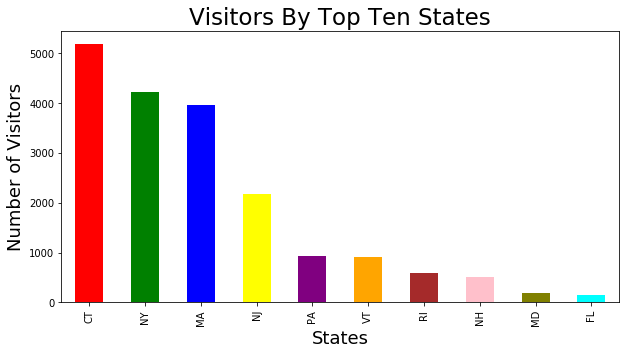

In [124]:
# Sometimes bar graphs are easier to read.
my_colors = list(['red', 'green', 'blue', 'yellow', 'purple', 'orange', 'brown',
                  'pink', 'olive', 'cyan'])  
df.purchaser_state.value_counts()[0:10].plot(kind='bar',color=my_colors, 
                                             figsize=(10,5))
plt.xlabel("States", fontsize=18)
plt.ylabel("Number of Visitors",fontsize=18)
plt.title('Visitors By Top Ten States', fontsize=23)
plt.show()

In [125]:
# Looks like almost all fifty states visit Magic!
df.purchaser_state.value_counts().count()

48

In [126]:
# There are a lot of missing values...
df.purchaser_state.isnull().sum()

64

In [127]:
# Create a new df with the top ten states
state_numbers = df.purchaser_state.value_counts()[0:10]

In [128]:
# Check out some of the top states
state_numbers.head()

CT    5191
NY    4224
MA    3968
NJ    2169
PA     924
Name: purchaser_state, dtype: int64

In [129]:
# Find the total of these top ten states
state_numbers.sum()

18820

In [130]:
# Trying to get the total out of 100 for waffle chart
state_numbers.sum()/188.72

99.72445951674439

In [131]:
#pip install pywaffle

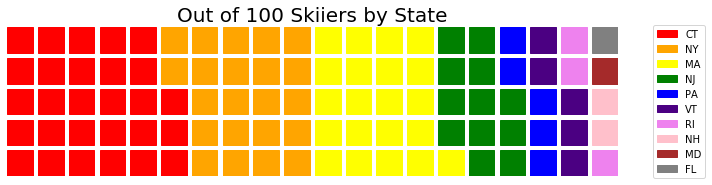

In [132]:
# Waffle Chart out of 100
fig = plt.figure(FigureClass = Waffle, rows=5, values = list(state_numbers.values/188.72), 
                 labels=list(state_numbers.index), figsize=(10,5), 
                 colors=('red', 'orange', 'yellow', 'green', 'blue','indigo',
                         'violet', 'pink', 'brown', 'gray'), 
                 legend={'loc': 'upper left', 'bbox_to_anchor': (1.05, 1.05)},
                 title= {'label': 'Out of 100 Skiiers by State', 'size': 20})

***Here is a fun way to show the number of skiiers by the top states - again, we see that CT, NY, and MA represent more than half of the visitors - though keep in mind the dataset didn't have any information on day-tickets or season pass holders.***

#### By address

In [133]:
# Missing a lot of data here... Maybe Liftopia doesn't require an address?
df.purchaser_address.count()

14111

In [134]:
# Look at 'store'
df.store.value_counts()

Magic Mountain    14113
Liftopia.com       5559
Name: store, dtype: int64

In [135]:
# Are these repeat buyers or are they group purchases?
df.purchaser_address.value_counts()

733 PROSPECT ST            33
8 Kane Road                28
136 Rhodes Road            25
456 Jones Hollow Road      23
209 old kings hwy North    22
                           ..
30 Allston St #2            1
7 Saddle Lane               1
20 Drysdale Lane            1
61 W. Hill Rd               1
PO Box 932                  1
Name: purchaser_address, Length: 5802, dtype: int64

In [136]:
# Looks like most addresses have two purchases
df.purchaser_address.value_counts().median()

2.0

In [137]:
# Look at the mean as well
df.purchaser_address.value_counts().mean()

2.432092381937263

In [138]:
# This is one of the address with multiple purchases
df.loc[df.purchaser_address == "733 PROSPECT ST"]

order_id order_status                                      product  \
8902   11985146.0         PAID          Magic Mountain | 1 Day Lift Tickets   
9597   12127034.0         PAID          Magic Mountain | 1 Day Lift Tickets   
9598   12127034.0         PAID          Magic Mountain | 1 Day Lift Tickets   
9599   12127034.0         PAID          Magic Mountain | 1 Day Lift Tickets   
9600   12127034.0         PAID          Magic Mountain | 1 Day Lift Tickets   
9601   12127034.0         PAID          Magic Mountain | 1 Day Lift Tickets   
11286  12307849.0         PAID          Magic Mountain | 2 Day Lift Tickets   
11287  12307849.0         PAID          Magic Mountain | 2 Day Lift Tickets   
11288  12307849.0         PAID          Magic Mountain | 2 Day Lift Tickets   
11289  12307949.0         PAID          Magic Mountain | 1 Day Lift Tickets   
12123  12436611.0         PAID          Magic Mountain | 1 Day Lift Tickets   
12124  12436611.0         PAID          Magic Mountain | 1 Day Lift Tickets   
12125  12436611.0         PAID          Magic Mountain | 1 Day Lift Tickets   
13178  12554825.0         PAID          Magic Mountain | 1 Day Lift Tickets   
13179  12554825.0         PAID          Magic Mountain | 1 Day Lift Tickets   
13182  12555015.0         PAID  Magic Mountain | 1 Day Lift Ticket + Tubing   
16884  13643832.0         PAID          Magic Mountain | 1 Day Lift Tickets   
16885  13643832.0         PAID          Magic Mountain | 1 Day Lift Tickets   
16886  13643832.0         PAID          Magic Mountain | 1 Day Lift Tickets   
16887  13643832.0         PAID          Magic Mountain | 1 Day Lift Tickets   
16888  13643832.0         PAID          Magic Mountain | 1 Day Lift Tickets   
17583  13817854.0         PAID          Magic Mountain | 1 Day Lift Tickets   
17584  13817854.0         PAID          Magic Mountain | 1 Day Lift Tickets   
17585  13817854.0         PAID          Magic Mountain | 1 Day Lift Tickets   
17586  13817854.0         PAID          Magic Mountain | 1 Day Lift Tickets   
17587  13817854.0         PAID          Magic Mountain | 1 Day Lift Tickets   
18261  13927628.0         PAID          Magic Mountain | 1 Day Lift Tickets   
18262  13927628.0         PAID          Magic Mountain | 1 Day Lift Tickets   
20100  14195384.0         PAID          Magic Mountain | 1 Day Lift Tickets   
20101  14195384.0         PAID          Magic Mountain | 1 Day Lift Tickets   
20102  14195384.0         PAID          Magic Mountain | 1 Day Lift Tickets   
20103  14195384.0         PAID          Magic Mountain | 1 Day Lift Tickets   
20104  14195384.0         PAID          Magic Mountain | 1 Day Lift Tickets   

          ticket_type           store order_date  trip_date marketing_opt_in  \
8902            Adult  Magic Mountain 2018-12-29 2018-12-31              Yes   
9597            Adult  Magic Mountain 2019-01-13 2019-01-27              Yes   
9598            Adult  Magic Mountain 2019-01-13 2019-01-27              Yes   
9599            Adult  Magic Mountain 2019-01-13 2019-01-27              Yes   
9600            Adult  Magic Mountain 2019-01-13 2019-01-27              Yes   
9601   Youth / Senior  Magic Mountain 2019-01-13 2019-01-27              Yes   
11286           Adult  Magic Mountain 2019-02-01 2019-02-09              Yes   
11287           Adult  Magic Mountain 2019-02-01 2019-02-09              Yes   
11288  Youth / Senior  Magic Mountain 2019-02-01 2019-02-09              Yes   
11289           Adult  Magic Mountain 2019-02-01 2019-02-09              Yes   
12123           Adult  Magic Mountain 2019-02-15 2019-02-19              Yes   
12124           Adult  Magic Mountain 2019-02-15 2019-02-19              Yes   
12125  Youth / Senior  Magic Mountain 2019-02-15 2019-02-19              Yes   
13178           Adult  Magic Mountain 2019-02-27 2019-03-03              Yes   
13179           Adult  Magic Mountain 2019-02-27 2019-03-03              Yes   
13182  Youth / Senior  Magic Mountain 2019

In [139]:
# Here is another address with multiple trips with six visitors each time
df.loc[df.purchaser_address == "8 Kane Road"]

order_id order_status                                      product  \
3107   10968821.0         PAID          Magic Mountain | 1 Day Lift Tickets   
3108   10968821.0         PAID          Magic Mountain | 1 Day Lift Tickets   
3109   10968821.0         PAID          Magic Mountain | 1 Day Lift Tickets   
3110   10968821.0         PAID          Magic Mountain | 1 Day Lift Tickets   
3111   10968821.0         PAID          Magic Mountain | 1 Day Lift Tickets   
3112   10968821.0         PAID          Magic Mountain | 1 Day Lift Tickets   
3113   10968872.0         PAID          Magic Mountain | 2 Day Lift Tickets   
3114   10968872.0         PAID          Magic Mountain | 2 Day Lift Tickets   
3115   10968872.0         PAID          Magic Mountain | 2 Day Lift Tickets   
3116   10968872.0         PAID          Magic Mountain | 2 Day Lift Tickets   
3117   10968872.0         PAID          Magic Mountain | 2 Day Lift Tickets   
3118   10968872.0         PAID          Magic Mountain | 2 Day Lift Tickets   
5271   11343367.0         PAID          Magic Mountain | 1 Day Lift Tickets   
5272   11343367.0         PAID          Magic Mountain | 1 Day Lift Tickets   
5273   11343367.0         PAID          Magic Mountain | 1 Day Lift Tickets   
5274   11343367.0         PAID          Magic Mountain | 1 Day Lift Tickets   
5275   11343367.0         PAID          Magic Mountain | 1 Day Lift Tickets   
5276   11343367.0         PAID          Magic Mountain | 1 Day Lift Tickets   
15595  13301855.0         PAID  Magic Mountain | 1 Day Lift Ticket + Rental   
15596  13301855.0         PAID  Magic Mountain | 1 Day Lift Ticket + Rental   
15597  13301954.0         PAID              Magic Mountain | All Day Tubing   
15598  13301954.0         PAID              Magic Mountain | All Day Tubing   
15599  13301980.0         PAID          Magic Mountain | 1 Day Lift Tickets   
15600  13301980.0         PAID          Magic Mountain | 1 Day Lift Tickets   
15601  13301980.0         PAID          Magic Mountain | 1 Day Lift Tickets   
15602  13301980.0         PAID          Magic Mountain | 1 Day Lift Tickets   
15603  13301980.0         PAID          Magic Mountain | 1 Day Lift Tickets   
15604  13301980.0         PAID          Magic Mountain | 1 Day Lift Tickets   

          ticket_type           store order_date  trip_date marketing_opt_in  \
3107            Adult  Magic Mountain 2017-12-20 2017-12-24              Yes   
3108            Adult  Magic Mountain 2017-12-20 2017-12-24              Yes   
3109   Youth / Senior  Magic Mountain 2017-12-20 2017-12-24              Yes   
3110   Youth / Senior  Magic Mountain 2017-12-20 2017-12-24              Yes   
3111   Youth / Senior  Magic Mountain 2017-12-20 2017-12-24              Yes   
3112   Youth / Senior  Magic Mountain 2017-12-20 2017-12-24              Yes   
3113            Adult  Magic Mountain 2017-12-20 2017-12-26              Yes   
3114            Adult  Magic Mountain 2017-12-20 2017-12-26              Yes   
3115   Youth / Senior  Magic Mountain 2017-12-20 2017-12-26              Yes   
3116   Youth / Senior  Magic Mountain 2017-12-20 2017-12-26              Yes   
3117   Youth / Senior  Magic Mountain 2017-12-20 2017-12-26              Yes   
3118   Youth / Senior  Magic Mountain 2017-12-20 2017-12-26              Yes   
5271            Adult  Magic Mountain 2018-02-14 2018-02-17              Yes   
5272            Adult  Magic Mountain 2018-02-14 2018-02-17              Yes   
5273   Youth / Senior  Magic Mountain 2018-02-14 2018-02-17              Yes   
5274   Youth / Senior  Magic Mountain 2018-02-14 2018-02-17              Yes   
5275   Youth / Senior  Magic Mountain 2018-02-14 2018-02-17              Yes   
5276   Youth / Senior  Magic Mountain 2018-02-14 2018-02-17              Yes   
15595           Adult  Magic Mountain 2019-12-28 2019-12-30              Yes   
15596  Youth / Senior  Magic Mountain 2019-12-28 2019-12-30              Yes   
15597        All Ages  Magic Mountain

In [140]:
# Sometimes this person skies alone, and sometimes with friends/family!
df.loc[df.purchaser_address == "136 Rhodes Road"]

order_id order_status                              product  \
968   10505969.0         PAID  Magic Mountain | 1 Day Lift Tickets   
4801  11290278.0         PAID  Magic Mountain | 1 Day Lift Tickets   
5052  11304269.0         PAID  Magic Mountain | 1 Day Lift Tickets   
5053  11304269.0         PAID  Magic Mountain | 1 Day Lift Tickets   
5054  11304269.0         PAID  Magic Mountain | 1 Day Lift Tickets   
5055  11304269.0         PAID  Magic Mountain | 1 Day Lift Tickets   
5676  11448526.0         PAID  Magic Mountain | 1 Day Lift Tickets   
5677  11448526.0         PAID  Magic Mountain | 1 Day Lift Tickets   
6189  11492202.0         PAID  Magic Mountain | 1 Day Lift Tickets   
6190  11492202.0         PAID  Magic Mountain | 1 Day Lift Tickets   
6191  11492202.0         PAID  Magic Mountain | 1 Day Lift Tickets   
6192  11492202.0         PAID  Magic Mountain | 1 Day Lift Tickets   
6834  11546055.0         PAID  Magic Mountain | 1 Day Lift Tickets   
6835  11546055.0         PAID  Magic Mountain | 1 Day Lift Tickets   
6836  11546055.0         PAID  Magic Mountain | 1 Day Lift Tickets   
6837  11546055.0         PAID  Magic Mountain | 1 Day Lift Tickets   
7208  11582545.0         PAID  Magic Mountain | 1 Day Lift Tickets   
7209  11582545.0         PAID  Magic Mountain | 1 Day Lift Tickets   
7210  11582545.0         PAID  Magic Mountain | 1 Day Lift Tickets   
7211  11582545.0         PAID  Magic Mountain | 1 Day Lift Tickets   
7212  11582545.0         PAID  Magic Mountain | 1 Day Lift Tickets   
7438  11624094.0         PAID  Magic Mountain | 1 Day Lift Tickets   
7439  11624094.0         PAID  Magic Mountain | 1 Day Lift Tickets   
7527  11642636.0         PAID  Magic Mountain | 1 Day Lift Tickets   
7528  11642636.0         PAID  Magic Mountain | 1 Day Lift Tickets   

         ticket_type           store order_date  trip_date marketing_opt_in  \
968            Adult  Magic Mountain 2017-02-09 2017-02-10              Yes   
4801           Adult  Magic Mountain 2018-02-06 2018-02-08              Yes   
5052           Adult  Magic Mountain 2018-02-08 2018-02-10              Yes   
5053           Adult  Magic Mountain 2018-02-08 2018-02-10              Yes   
5054  Youth / Senior  Magic Mountain 2018-02-08 2018-02-10              Yes   
5055  Youth / Senior  Magic Mountain 2018-02-08 2018-02-10              Yes   
5676           Adult  Magic Mountain 2018-03-02 2018-03-03              Yes   
5677  Youth / Senior  Magic Mountain 2018-03-02 2018-03-03              Yes   
6189           Adult  Magic Mountain 2018-03-08 2018-03-10              Yes   
6190           Adult  Magic Mountain 2018-03-08 2018-03-10              Yes   
6191  Youth / Senior  Magic Mountain 2018-03-08 2018-03-10              Yes   
6192  Youth / Senior  Magic Mountain 2018-03-08 2018-03-10              Yes   
6834           Adult  Magic Mountain 2018-03-15 2018-03-17              Yes   
6835           Adult  Magic Mountain 2018-03-15 2018-03-17              Yes   
6836  Youth / Senior  Magic Mountain 2018-03-15 2018-03-17              Yes   
6837  Youth / Senior  Magic Mountain 2018-03-15 2018-03-17              Yes   
7208           Adult  Magic Mountain 2018-03-21 2018-03-23              Yes   
7209           Adult  Magic Mountain 2018-03-21 2018-03-23              Yes   
7210           Adult  Magic Mountain 2018-03-21 2018-03-23              Yes   
7211  Youth / Senior  Magic Mountain 2018-03-21 2018-03-23              Yes   
7212  Youth / Senior  Magic Mountain 2018-03-21 2018-03-23              Yes   
7438           Adult  Magic Mountain 2018-03-30 2018-03-31              Yes   
7439  Youth / Senior  Magic Mountain 2018-03-30 2018-03-31              Yes   
7527           Adult  Magic Mountain 2018-04-05 2018-04-07              Yes   
7528  Youth / Senior  Magic Mountain 2018-04-05 2018-04-07              Yes   

     purchaser_address purchaser_city purchaser_state  purchaser_zip  \
968    136 Rhodes Road        Tolland              CT       

### Revenue

In [141]:
# Look at ticket sales
df.net_rate_revenue.describe()

count    19672.000000
mean        51.210320
std         23.840826
min          1.860000
25%         38.120000
50%         47.420000
75%         57.650000
max        261.320000
Name: net_rate_revenue, dtype: float64

In [142]:
# Break up the two stores into two df's
liftopia = df[df.store == 'Liftopia.com']

In [143]:
# Second df
magic = df[df.store == 'Magic Mountain']

In [144]:
# Tickets from 'Liftopia'
liftopia.net_rate_revenue.describe()

count    5559.000000
mean       45.559579
std        18.619888
min        13.590000
25%        34.840000
50%        43.340000
75%        50.990000
max       194.640000
Name: net_rate_revenue, dtype: float64

Text(0.5, 1.0, 'Liftopia Store')

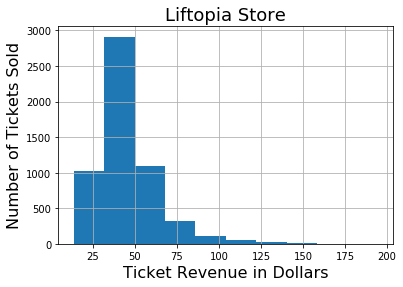

In [145]:
# Histogram of ticket prices
liftopia.net_rate_revenue.hist()
plt.xlabel("Ticket Revenue in Dollars", size=16)
plt.ylabel("Number of Tickets Sold", size=16)
plt.title("Liftopia Store", size=18)

In [146]:
# Now for other df
magic.net_rate_revenue.describe()

count    14113.000000
mean        53.436102
std         25.262679
min          1.860000
25%         39.050000
50%         50.210000
75%         59.510000
max        261.320000
Name: net_rate_revenue, dtype: float64

Text(0.5, 1.0, 'Magic Online Store')

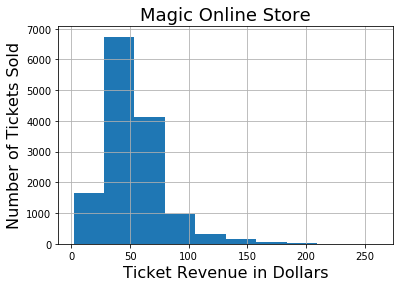

In [147]:
# The other store histogram
magic.net_rate_revenue.hist()
plt.xlabel("Ticket Revenue in Dollars", size=16)
plt.ylabel("Number of Tickets Sold", size=16)
plt.title("Magic Online Store", size=18)

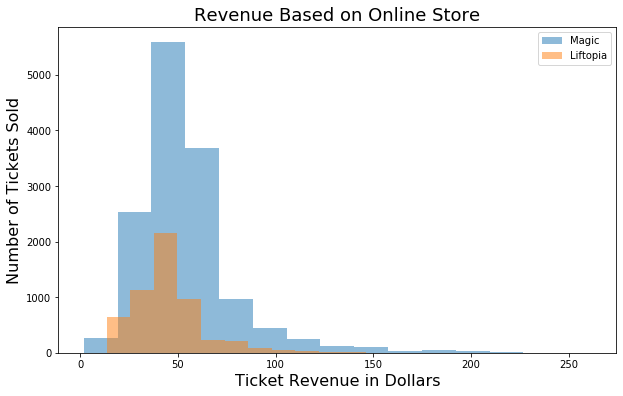

In [148]:
# Histogram of Revenue based on Store
plt.figure(figsize=(10,6))
plt.hist(magic.net_rate_revenue, bins=15, alpha=0.5, label="Magic")
plt.hist(liftopia.net_rate_revenue, bins=15, alpha=0.5, label="Liftopia")
plt.xlabel("Ticket Revenue in Dollars", size=16)
plt.ylabel("Number of Tickets Sold", size=16)
plt.title("Revenue Based on Online Store", size=18)
plt.legend(loc='upper right')

***It makes sense that the resort makes more money from their own online store instead of
the outside vendor. This overlapping histogram shows not only the overall difference but how the variance is also greater for the online store.***

# Missing Values

## Trying to fill those missing values from another dataset

In [149]:
# Zip code info from zipcode database
# https://www.unitedstateszipcodes.org/zip-code-database/
state_codes = pd.read_csv("Data_Folder/zip_code_database.csv")
state_codes.head()

zip      type  decommissioned primary_city acceptable_cities  \
0  501    UNIQUE               0   Holtsville               NaN   
1  544    UNIQUE               0   Holtsville               NaN   
2  601  STANDARD               0     Adjuntas               NaN   
3  602  STANDARD               0       Aguada               NaN   
4  603  STANDARD               0    Aguadilla             Ramey   

                                 unacceptable_cities state  \
0                               I R S Service Center    NY   
1                                 Irs Service Center    NY   
2  Colinas Del Gigante, Jard De Adjuntas, Urb San...    PR   
3  Alts De Aguada, Bo Guaniquilla, Comunidad Las ...    PR   
4  Bda Caban, Bda Esteves, Bo Borinquen, Bo Ceiba...    PR   

                county             timezone area_codes world_region country  \
0       Suffolk County     America/New_York        631          NaN      US   
1       Suffolk County     America/New_York        631          NaN      US   
2   Adjuntas Municipio  America/Puerto_Rico    787,939          NaN      US   
3     Aguada Municipio  America/Puerto_Rico    787,939          NaN      US   
4  Aguadilla Municipio  America/Puerto_Rico        787          NaN      US   

   latitude  longitude  irs_estimated_population_2015  
0     40.81     -73.04                            562  
1     40.81     -73.04                              0  
2     18.16     -66.72                              0  
3     18.38     -67.18                              0  
4     18.43     -67.15                              0

In [150]:
# I just want the zipcodes and the lat/lon
state_codes = state_codes.filter(['zip', 'primary_city', 'state', 'county', 
                                  'latitude', 'longitude'], axis=1)
state_codes.head()

zip primary_city state               county  latitude  longitude
0  501   Holtsville    NY       Suffolk County     40.81     -73.04
1  544   Holtsville    NY       Suffolk County     40.81     -73.04
2  601     Adjuntas    PR   Adjuntas Municipio     18.16     -66.72
3  602       Aguada    PR     Aguada Municipio     18.38     -67.18
4  603    Aguadilla    PR  Aguadilla Municipio     18.43     -67.15

In [151]:
# Merge the lat and lon with my original dataframe
df_skiers = df.merge(state_codes, left_on='purchaser_zip', right_on='zip')
df_skiers.head()

order_id order_status                              product  \
0  10097099.0    CANCELLED  Magic Mountain | 2 Day Lift Tickets   
1  10097099.0    CANCELLED  Magic Mountain | 2 Day Lift Tickets   
2  10097104.0    CANCELLED  Magic Mountain | 2 Day Lift Tickets   
3  10097104.0    CANCELLED  Magic Mountain | 2 Day Lift Tickets   
4  10402020.0         PAID  Magic Mountain | 1 Day Lift Tickets   

      ticket_type           store order_date  trip_date marketing_opt_in  \
0  Youth / Senior  Magic Mountain 2016-11-11 2016-12-31              Yes   
1           Adult  Magic Mountain 2016-11-11 2016-12-31              Yes   
2  Youth / Senior  Magic Mountain 2016-11-11 2016-12-31              Yes   
3           Adult  Magic Mountain 2016-11-11 2016-12-31              Yes   
4           Adult    Liftopia.com 2017-01-23 2017-01-28               No   

     purchaser_address purchaser_city  ... purchaser_country  \
0  23 Jefferson Circle        Clinton  ...                US   
1  23 Jefferson Circle        Clinton  ...                US   
2  23 Jefferson Circle        Clinton  ...                US   
3  23 Jefferson Circle        Clinton  ...                US   
4                  NaN        Clinton  ...                US   

   net_rate_revenue currency  order_to_trip_days   zip  primary_city  state  \
0             50.21      USD                  50  6413       Clinton     CT   
1             69.74      USD                  50  6413       Clinton     CT   
2             50.21      USD                  50  6413       Clinton     CT   
3             69.74      USD                  50  6413       Clinton     CT   
4             40.79      USD                   5  6413       Clinton     CT   

             county latitude longitude  
0  Middlesex County    41.27    -72.53  
1  Middlesex County    41.27    -72.53  
2  Middlesex County    41.27    -72.53  
3  Middlesex County    41.27    -72.53  
4  Middlesex County    41.27    -72.53  

[5 rows x 22 columns]

In [152]:
# The shape doesn't seem quite right...
df_skiers.shape

(19612, 22)

In [153]:
# Get rid of the unnecessary categorical columns
df_skiers = df_skiers.drop(['order_status', 'marketing_opt_in', 'purchaser_country',
                              'currency'], axis=1)

In [154]:
# I still have some missing values
df.purchaser_state.isnull().sum()

64

In [155]:
# Which ones are missing values?
df_skiers[df_skiers.purchaser_state.isnull()].head()

order_id                              product     ticket_type  \
1022  12437415.0  Magic Mountain | 2 Day Lift Tickets           Adult   
1023  12437415.0  Magic Mountain | 2 Day Lift Tickets           Adult   
1562  12187666.0  Magic Mountain | 1 Day Lift Tickets           Adult   
1598  13694677.0  Magic Mountain | 1 Day Lift Tickets           Adult   
3455  13697167.0  Magic Mountain | 1 Day Lift Tickets  Youth / Senior   

               store order_date  trip_date     purchaser_address  \
1022  Magic Mountain 2019-02-15 2019-02-16  390 Metropolitan Ave   
1023  Magic Mountain 2019-02-15 2019-02-16  390 Metropolitan Ave   
1562  Magic Mountain 2019-01-19 2019-01-20         343 Sperry Rd   
1598    Liftopia.com 2020-01-24 2020-01-25                   NaN   
3455  Magic Mountain 2020-01-24 2020-01-25        105 East Court   

     purchaser_city purchaser_state  purchaser_zip  net_rate_revenue  \
1022       Brooklyn             NaN          11211            117.17   
1023       Brooklyn             NaN          11211            117.17   
1562        Bethany             NaN           6524             68.82   
1598     Brookfield             NaN           6804             50.99   
3455   Wading River             NaN          11792             41.84   

      order_to_trip_days    zip  primary_city state            county  \
1022                   1  11211      Brooklyn    NY      Kings County   
1023                   1  11211      Brooklyn    NY      Kings County   
1562                   1   6524       Bethany    CT  New Haven County   
1598                   1   6804    Brookfield    CT  Fairfield County   
3455                   1  11792  Wading River    NY    Suffolk County   

      latitude  longitude  
1022     40.71     -73.95  
1023     40.71     -73.95  
1562     41.42     -72.99  
1598     41.46     -73.39  
3455     40.94     -72.81

In [156]:
# Use the state data from other dataset to fill Nan's
df.purchaser_state.fillna(df_skiers.state, inplace=True)

In [157]:
# Not sure why it didn't work on all of them
df.purchaser_state.isnull().sum()

6

In [158]:
# Can't figure out why these didn't fill
df[df.purchaser_state.isnull()]

order_id order_status                              product  \
19808  14136994.0         PAID      Magic Mountain | All Day Tubing   
20039  14179376.0         PAID  Magic Mountain | 1 Day Lift Tickets   
20040  14179376.0         PAID  Magic Mountain | 1 Day Lift Tickets   
20041  14179376.0         PAID  Magic Mountain | 1 Day Lift Tickets   
20285  14220109.0         PAID  Magic Mountain | 1 Day Lift Tickets   
20346  14235476.0         PAID  Magic Mountain | 1 Day Lift Tickets   

          ticket_type           store order_date  trip_date marketing_opt_in  \
19808        All Ages  Magic Mountain 2020-02-26 2020-02-29               No   
20039           Adult  Magic Mountain 2020-03-01 2020-03-06               No   
20040  Youth / Senior  Magic Mountain 2020-03-01 2020-03-06               No   
20041  Youth / Senior  Magic Mountain 2020-03-01 2020-03-06               No   
20285           Adult  Magic Mountain 2020-03-06 2020-03-07               No   
20346           Adult  Magic Mountain 2020-03-07 2020-03-08               No   

            purchaser_address purchaser_city purchaser_state  purchaser_zip  \
19808          63 Pleasant St       Winthrop             NaN           2152   
20039     7 Driftway Point Rd        Danbury             NaN           6811   
20040     7 Driftway Point Rd        Danbury             NaN           6811   
20041     7 Driftway Point Rd        Danbury             NaN           6811   
20285  2754 S Linebarger Terr      Milwaukee             NaN          53207   
20346     150 Furnace Hill Rd       Cheshire             NaN           1225   

      purchaser_country  net_rate_revenue currency  order_to_trip_days  
19808                US             23.24      USD                   3  
20039                US             42.77      USD                   5  
20040                US             26.03      USD                   5  
20041                US             27.89      USD                   5  
20285                US             57.65      USD                   1  
20346                US             53.00      USD                   1

***My hope had been to avoid doing all of the zip code cleaning by just merging the dataset with this outside dataset where I was confident the zip codes were correct - not to mention merge in the county data for additional maps. But unfortunately, I needed the cleaned zip codes in order to correctly complete the merge!***

# Sales By Year

## What does the yearly trend look like?

In [159]:
# I want to look at the sales by year
years = [df_2017.shape, df_2018.shape, df_2019.shape, df_2020.shape]

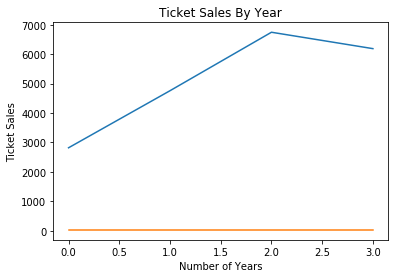

In [160]:
# Visualize the sales by year
import matplotlib.pyplot as plt
plt.plot(years)
plt.xlabel('Number of Years')
plt.ylabel('Ticket Sales')
plt.title('Ticket Sales By Year')
plt.show()

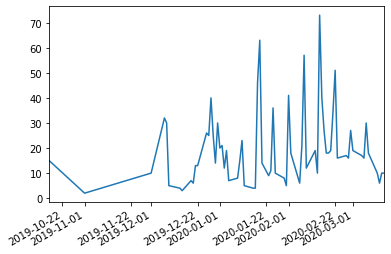

In [161]:
# I want to look at one season to get an idea of where the revenue is coming in.
skiers_2020_zipcodes.trip_date.value_counts().plot()

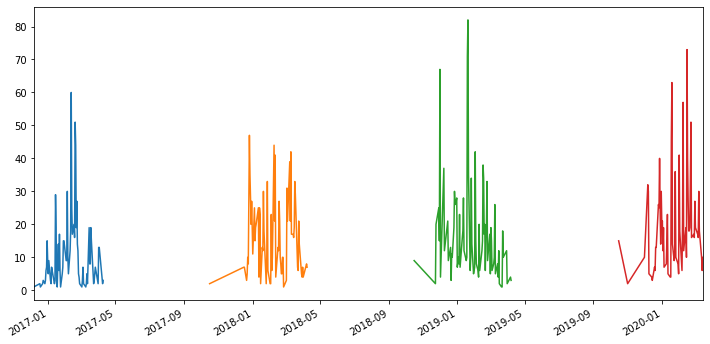

In [162]:
# Looks like most of the spikes are weekends or holidays
plt.figure(figsize=(12,6))
skiers_2017_zipcodes.trip_date.value_counts().plot()
skiers_2018_zipcodes.trip_date.value_counts().plot()
skiers_2019_zipcodes.trip_date.value_counts().plot()
skiers_2020_zipcodes.trip_date.value_counts().plot()

In general, I feel as if the four years are pretty similar. Taking into account the fact that the 2020 season was cut short due to Covid-19 and the 2019 season had a couple dates that were exceptionally large - perhaps due to snow conditions. 2018 seems the most consistent, and since 2017 is the first year in the dataset it make sense that it would have the least number of spikes.

***I considered doing a Time Series model on the four years but ultimately felt as if I didn't have enough data. Not to mention that this coming season will most likely be affected by Covid-19, which will seemingly be impossible to predict how things are going to go.***

# Grouped by Address

I want to group each ticket order by address and make numerical features from some of the categorical columns  (such as: number of tickets purchases, number of adult tickets purchased, number of child tickets purchased, etc.) in order to better understand the types of skiers at the resort. My hope is to look at returning customers and the areas (by city or zip code) that brought in the most revenue.

## Groupby Repeat Customers

In [163]:
# Group all the customers by trip date
the_customers = skier_zip.groupby('purchaser_address')['trip_date'].nunique()
the_customers = pd.DataFrame(the_customers)
# Total number of customers
the_customers.shape

(5780, 1)

In [164]:
# Set customers who returned to repeat df
repeat_customers = the_customers[the_customers.trip_date > 1]

In [165]:
# Those that didn't come back
non_repeat_cust = the_customers[the_customers.trip_date <= 1]

In [166]:
# Repeat customers
repeat_customers.describe()

trip_date
count  897.000000
mean     2.576366
std      1.195704
min      2.000000
25%      2.000000
50%      2.000000
75%      3.000000
max     13.000000

In [167]:
# Percent of total after data cleaning
rc = len(repeat_customers)/len(the_customers)
print('Percent of customers who came more than once:', round(rc*100, 2),'%')

Percent of customers who came more than once: 15.52 %


In [168]:
# One time customers
non_repeat_cust.describe()

trip_date
count     4883.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0

In [169]:
# Percent of total
rcn = len(non_repeat_cust)/len(the_customers)
print('Percent of customers who came only once:', round(rcn*100, 2), '%')

Percent of customers who came only once: 84.48 %


In [170]:
# Revisit my cleaned dataframe
df.shape

(19672, 16)

In [171]:
# While the 'df' dataframe is my cleaned version, it still has some missing values.
# Plus it doesn't have the new columns I added.
df.isnull().sum()

order_id                 0
order_status             0
product                  0
ticket_type              0
store                    0
order_date               0
trip_date                0
marketing_opt_in         0
purchaser_address     5561
purchaser_city           0
purchaser_state          6
purchaser_zip            0
purchaser_country        0
net_rate_revenue         0
currency                 0
order_to_trip_days       0
dtype: int64

In [172]:
# The 'skier_zip' dataframe has all my columns
skier_zip.shape

(19612, 19)

In [173]:
# Revisit the head()
skier_zip.head()

order_id order_status                              product  \
0  10097099.0    CANCELLED  Magic Mountain | 2 Day Lift Tickets   
1  10097099.0    CANCELLED  Magic Mountain | 2 Day Lift Tickets   
2  10097104.0    CANCELLED  Magic Mountain | 2 Day Lift Tickets   
3  10097104.0    CANCELLED  Magic Mountain | 2 Day Lift Tickets   
4  10402020.0         PAID  Magic Mountain | 1 Day Lift Tickets   

      ticket_type           store order_date  trip_date marketing_opt_in  \
0  Youth / Senior  Magic Mountain 2016-11-11 2016-12-31              Yes   
1           Adult  Magic Mountain 2016-11-11 2016-12-31              Yes   
2  Youth / Senior  Magic Mountain 2016-11-11 2016-12-31              Yes   
3           Adult  Magic Mountain 2016-11-11 2016-12-31              Yes   
4           Adult    Liftopia.com 2017-01-23 2017-01-28               No   

     purchaser_address purchaser_city purchaser_state  purchaser_zip  \
0  23 Jefferson Circle        Clinton              CT           6413   
1  23 Jefferson Circle        Clinton              CT           6413   
2  23 Jefferson Circle        Clinton              CT           6413   
3  23 Jefferson Circle        Clinton              CT           6413   
4                  NaN        Clinton              CT           6413   

  purchaser_country  net_rate_revenue currency  order_to_trip_days   zip  \
0                US             50.21      USD                  50  6413   
1                US             69.74      USD                  50  6413   
2                US             50.21      USD                  50  6413   
3                US             69.74      USD                  50  6413   
4                US             40.79      USD                   5  6413   

   latitude  longitude  
0     41.27     -72.53  
1     41.27     -72.53  
2     41.27     -72.53  
3     41.27     -72.53  
4     41.27     -72.53

In [174]:
# This dataframe still has all the missing values from Liftopia.com
skier_zip.describe()

order_id  purchaser_zip  net_rate_revenue  order_to_trip_days  \
count  1.961200e+04   19612.000000      19612.000000        19612.000000   
mean   1.223178e+07    8940.363808         51.214013            7.540740   
std    1.163091e+06   10608.664031         23.856962           16.759546   
min    1.009710e+07     850.000000          1.860000            0.000000   
25%    1.130424e+07    3608.000000         38.120000            1.000000   
50%    1.216472e+07    6525.000000         47.420000            2.000000   
75%    1.328270e+07   11102.250000         57.650000            6.000000   
max    1.428648e+07   98629.000000        261.320000          227.000000   

                zip      latitude     longitude  
count  19612.000000  19612.000000  19612.000000  
mean    8940.363808     41.347315    -73.798622  
std    10608.664031      1.908963      4.936009  
min      850.000000     17.760000   -157.730000  
25%     3608.000000     40.840000    -73.990000  
50%     6525.000000     41.480000    -73.130000  
75%    11102.250000     42.300000    -72.390000  
max    98629.000000     48.440000    -64.820000

***The median distance from the resort was 130 miles.***

***The median number of days between the order and trip was 2.***

***The median revenue per ticket was 47 dollars.***

## Groupby Ticket Type

In [175]:
# Get a new df with the count of trips by address
all_customers = skier_zip.groupby('purchaser_address')['trip_date'].nunique()
all_customers = pd.DataFrame(all_customers)

In [176]:
# Rename column
all_customers.columns = ['Number of Trips']

In [177]:
# Make sure it worked
all_customers.head()

Number of Trips
purchaser_address                           
!4 Cedar Terrace                           2
#433, 700 Bloomfield Avenue                1
08 woodmont rd                             1
1 Abington Road                            1
1 Andrew Circle                            1

In [178]:
# Look at the sum of ticket revenue by address
skier_zip.groupby('purchaser_address')['net_rate_revenue'].sum()

purchaser_address
!4 Cedar Terrace               282.68
#433, 700 Bloomfield Avenue     60.44
08 woodmont rd                  82.76
1 Abington Road                 41.84
1 Andrew Circle                208.28
                                ...  
po box 551                      99.48
po box 596                     119.02
po box 605                      55.79
po box 75                       62.30
po. box 507                    316.16
Name: net_rate_revenue, Length: 5780, dtype: float64

In [179]:
# Look at the revenue by address
skier_zip.groupby('purchaser_address')['net_rate_revenue'].mean()

purchaser_address
!4 Cedar Terrace               70.67
#433, 700 Bloomfield Avenue    60.44
08 woodmont rd                 82.76
1 Abington Road                41.84
1 Andrew Circle                52.07
                               ...  
po box 551                     33.16
po box 596                     59.51
po box 605                     55.79
po box 75                      62.30
po. box 507                    79.04
Name: net_rate_revenue, Length: 5780, dtype: float64

In [180]:
# Add this column to my groupby df
all_customers["Total Revenue"] = skier_zip.groupby('purchaser_address')['net_rate_revenue'].sum()

In [181]:
# Make sure it worked
all_customers.head()

Number of Trips  Total Revenue
purchaser_address                                          
!4 Cedar Terrace                           2         282.68
#433, 700 Bloomfield Avenue                1          60.44
08 woodmont rd                             1          82.76
1 Abington Road                            1          41.84
1 Andrew Circle                            1         208.28

In [182]:
# Look at my mean order to trip day column
skier_zip.groupby('purchaser_address')['order_to_trip_days'].mean()

purchaser_address
!4 Cedar Terrace               2.000000
#433, 700 Bloomfield Avenue    1.000000
08 woodmont rd                 1.000000
1 Abington Road                5.000000
1 Andrew Circle                1.000000
                                 ...   
po box 551                     5.333333
po box 596                     3.000000
po box 605                     1.000000
po box 75                      1.000000
po. box 507                    1.000000
Name: order_to_trip_days, Length: 5780, dtype: float64

In [183]:
# Add order to trip day column to groupby df
all_customers["Mean Order Time"] = skier_zip.groupby('purchaser_address')['order_to_trip_days'].mean()

In [184]:
# Add in Adult tickets
all_customers['Adult Tickets'] = skier_zip[skier_zip['ticket_type'] =='Adult'
                                          ].groupby('purchaser_address')['ticket_type'].count()

In [185]:
# Add in Youth/Senior tickets
all_customers['Youth/Senior Tickets'] = skier_zip[skier_zip['ticket_type'] == 'Youth / Senior'
                                                 ].groupby('purchaser_address')['ticket_type'].count()

In [186]:
# Get a look at my groupby df
all_customers.head()

Number of Trips  Total Revenue  Mean Order Time  \
purchaser_address                                                              
!4 Cedar Terrace                           2         282.68              2.0   
#433, 700 Bloomfield Avenue                1          60.44              1.0   
08 woodmont rd                             1          82.76              1.0   
1 Abington Road                            1          41.84              5.0   
1 Andrew Circle                            1         208.28              1.0   

                             Adult Tickets  Youth/Senior Tickets  
purchaser_address                                                 
!4 Cedar Terrace                       4.0                   NaN  
#433, 700 Bloomfield Avenue            1.0                   NaN  
08 woodmont rd                         NaN                   1.0  
1 Abington Road                        1.0                   NaN  
1 Andrew Circle                        4.0                   NaN

In [187]:
# Fill in all the na's tickets with zero
all_customers['Adult Tickets'] = all_customers['Adult Tickets'].fillna(0)

In [188]:
# Check to see if it worked
all_customers.head()

Number of Trips  Total Revenue  Mean Order Time  \
purchaser_address                                                              
!4 Cedar Terrace                           2         282.68              2.0   
#433, 700 Bloomfield Avenue                1          60.44              1.0   
08 woodmont rd                             1          82.76              1.0   
1 Abington Road                            1          41.84              5.0   
1 Andrew Circle                            1         208.28              1.0   

                             Adult Tickets  Youth/Senior Tickets  
purchaser_address                                                 
!4 Cedar Terrace                       4.0                   NaN  
#433, 700 Bloomfield Avenue            1.0                   NaN  
08 woodmont rd                         0.0                   1.0  
1 Abington Road                        1.0                   NaN  
1 Andrew Circle                        4.0                   NaN

In [189]:
# Same with these tickets
all_customers['Youth/Senior Tickets'] = all_customers['Youth/Senior Tickets'].fillna(0)

In [190]:
# Check out my groupby df
all_customers.head()

Number of Trips  Total Revenue  Mean Order Time  \
purchaser_address                                                              
!4 Cedar Terrace                           2         282.68              2.0   
#433, 700 Bloomfield Avenue                1          60.44              1.0   
08 woodmont rd                             1          82.76              1.0   
1 Abington Road                            1          41.84              5.0   
1 Andrew Circle                            1         208.28              1.0   

                             Adult Tickets  Youth/Senior Tickets  
purchaser_address                                                 
!4 Cedar Terrace                       4.0                   0.0  
#433, 700 Bloomfield Avenue            1.0                   0.0  
08 woodmont rd                         0.0                   1.0  
1 Abington Road                        1.0                   0.0  
1 Andrew Circle                        4.0                   0.0

## Distance from Resort

In order to figure out how far customers were traveling to the resort, my project advisor led me to Google's "The Distance Matrix API". But I really didn't want to have to pay, especially since I would have thousands of zip codes to look up. Instead, I took a less specific and far simpler approach. I decided to use 'import geopy.distance' and get a straight line distance - which apparently doesn't take into the curvature of the earth and certainly doesn't account for the less-than-straight path of roads and highways. Though considering the majority of travelers would be coming from New England and probably not very far, I figured the tradeoffs were worth it.

In [191]:
# Create new list with distance 'As the crow flies!'
coords_1 = (43.192778, -72.76)
distance = []
for i in range(len(skier_zip)):
    coords_2 = (skier_zip.latitude[i], skier_zip.longitude[i])
    miles = geopy.distance.distance(coords_1, coords_2).miles
    distance.append(miles)

In [192]:
# Add this list as a column to groupby df
skier_zip['Miles to Resort'] = distance

In [193]:
# Review a number of the distances to make sure it worked.
# https://www.freemaptools.com/distance-between-usa-zip-codes.htm
skier_zip.tail()

order_id order_status                              product  \
19607  14266821.0         PAID  Magic Mountain | 1 Day Lift Tickets   
19608  14285295.0         PAID  Magic Mountain | 1 Day Lift Tickets   
19609  14285522.0         PAID  Magic Mountain | 1 Day Lift Tickets   
19610  14285522.0         PAID  Magic Mountain | 1 Day Lift Tickets   
19611  14285876.0         PAID  Magic Mountain | 1 Day Lift Tickets   

          ticket_type           store order_date  trip_date marketing_opt_in  \
19607           Adult  Magic Mountain 2020-03-11 2020-03-12              Yes   
19608           Adult  Magic Mountain 2020-03-14 2020-03-15               No   
19609           Adult    Liftopia.com 2020-03-14 2020-03-15               No   
19610  Youth / Senior    Liftopia.com 2020-03-14 2020-03-15               No   
19611           Adult  Magic Mountain 2020-03-14 2020-03-15               No   

       purchaser_address  purchaser_city purchaser_state  purchaser_zip  \
19607       P.O. Box 367       Tyringham              MA           1264   
19608  429 Center Street      Zelienople              PA          16063   
19609                NaN   Safety Harbor              FL          34695   
19610                NaN   Safety Harbor              FL          34695   
19611      1752 18th st.  Cuyahoga Falls              OH          44223   

      purchaser_country  net_rate_revenue currency  order_to_trip_days    zip  \
19607                US             26.03      USD                   1   1264   
19608                US             51.14      USD                   1  16063   
19609                US             46.74      USD                   1  34695   
19610                US             38.24      USD                   1  34695   
19611                US             51.14      USD                   1  44223   

       latitude  longitude  Miles to Resort  
19607     42.24     -73.19        69.312836  
19608     40.78     -80.14       414.700072  
19609     28.00     -82.69      1185.262096  
19610     28.00     -82.69      1185.262096  
19611     41.16     -81.52       470.836891

In [194]:
# Add this column to by groupby using mean
all_customers["Miles to Resort"] = skier_zip.groupby('purchaser_address')['Miles to Resort'].mean()

In [195]:
# My final groupby df
all_customers.head()

Number of Trips  Total Revenue  Mean Order Time  \
purchaser_address                                                              
!4 Cedar Terrace                           2         282.68              2.0   
#433, 700 Bloomfield Avenue                1          60.44              1.0   
08 woodmont rd                             1          82.76              1.0   
1 Abington Road                            1          41.84              5.0   
1 Andrew Circle                            1         208.28              1.0   

                             Adult Tickets  Youth/Senior Tickets  \
purchaser_address                                                  
!4 Cedar Terrace                       4.0                   0.0   
#433, 700 Bloomfield Avenue            1.0                   0.0   
08 woodmont rd                         0.0                   1.0   
1 Abington Road                        1.0                   0.0   
1 Andrew Circle                        4.0                   0.0   

                             Miles to Resort  
purchaser_address                             
!4 Cedar Terrace                  216.871422  
#433, 700 Bloomfield Avenue        95.456885  
08 woodmont rd                    178.489755  
1 Abington Road                   250.364930  
1 Andrew Circle                    95.481157

## Scale the data

In [196]:
# Get a look at the stats before I transform the data
all_customers.describe()

Number of Trips  Total Revenue  Mean Order Time  Adult Tickets  \
count      5780.000000    5780.000000      5780.000000    5780.000000   
mean          1.244637     130.039533         6.213475       1.664879   
std           0.739942     124.982960        13.659577       1.397466   
min           1.000000      14.870000         0.000000       0.000000   
25%           1.000000      55.790000         1.000000       1.000000   
50%           1.000000      96.700000         2.000000       1.000000   
75%           1.000000     157.130000         5.000000       2.000000   
max          13.000000    1729.580000       192.000000      25.000000   

       Youth/Senior Tickets  Miles to Resort  
count           5780.000000      5780.000000  
mean               0.635813       175.634039  
std                1.317839       262.965176  
min                0.000000         2.982793  
25%                0.000000        92.853950  
50%                0.000000       128.924797  
75%                1.000000       178.083874  
max               16.000000      4981.738462

In [197]:
# Initiate Standard Scaler - because of distance based metric
scaler = StandardScaler()

In [198]:
# Transform and fit the data
scaled_all_customers = scaler.fit_transform(all_customers)

In [199]:
# Convert back into a dataframe with column names
scaled_all_customers_df = pd.DataFrame(scaled_all_customers, 
                                       columns=all_customers.columns)

In [200]:
# Check out the scaled df
scaled_all_customers_df.head()

Number of Trips  Total Revenue  Mean Order Time  Adult Tickets  \
0         1.020930       1.221396        -0.308490       1.671113   
1        -0.330645      -0.556920        -0.381705      -0.475816   
2        -0.330645      -0.378321        -0.381705      -1.191459   
3        -0.330645      -0.705754        -0.088845      -0.475816   
4        -0.330645       0.626063        -0.381705       1.671113   

   Youth/Senior Tickets  Miles to Resort  
0             -0.482508         0.156830  
1             -0.482508        -0.304923  
2              0.276375         0.010861  
3             -0.482508         0.284210  
4             -0.482508        -0.304831

# K Means Cluster Model

## Within Cluster Sum of Squares Elbow Method

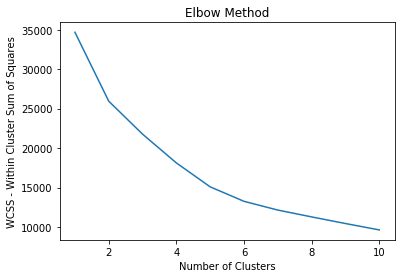

In [201]:
# Looking at the parms for k-means
wcss = []
for i in range(1, 11):
    kmeans_all_customers_model_1 = KMeans(n_clusters=i, init='k-means++', 
                                          max_iter=300, n_init=10, random_state=0)
    kmeans_all_customers_model_1.fit(scaled_all_customers_df)
    wcss.append( kmeans_all_customers_model_1.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS - Within Cluster Sum of Squares')
plt.show()

After playing around with the KMeans parameters and tryings a variety of WCSS Methods I decided it was still pretty hard to determine the number of clusters I should use. I ran my model using 3, 5, and 7 clusters to get a sense of how the model was breaking up the data. In the end I decided that 3 clusters was too few and didn't provide enough variability within the groups. On the other end of the spectrum, 7 clusters had too many groups where a number of the clusters became overly specific and redundant. I decided to stick with 5 clusters and ran my final model. 

In [202]:
# Review my column names
scaled_all_customers_df.columns

Index(['Number of Trips', 'Total Revenue', 'Mean Order Time', 'Adult Tickets',
       'Youth/Senior Tickets', 'Miles to Resort'],
      dtype='object')

## Examining Cluster Function

I wrote this function to help me look at some statistics within each cluster. I played around with the number of columns as well as how the stats should run, looking at medians, sums, and other ways to organize the k means clusters. This is the final function.

In [203]:
def examine_clusters_again(df):
    """
    This function takes in the dataframe with the new cluster column after 
    the kmeans cluster model function. It runs statistics based on 
    the number of clusters found.
    
    Returns
    -------
    A new dataframe with the stats for each cluster.
    """
    # function takes in the number of clusters depending on the k means model
    rows_list = []
    cluster_list = df.Cluster.unique()
    cluster_list = cluster_list.tolist()
    cluster_list.sort()
    # for each cluster it runs these averages
    for i in cluster_list:
        cluster_group = df[df.Cluster == i]
        cluster_length = len(df[df['Cluster'] == i])
        trip_mean = cluster_group['Number of Trips'].mean()
        rev_mean = cluster_group['Total Revenue'].mean()
        order_mean = cluster_group['Mean Order Time'].mean()
        adult_mean = cluster_group['Adult Tickets'].mean()
        youth_mean = cluster_group['Youth/Senior Tickets'].mean()
        miles_mean = cluster_group['Miles to Resort'].mean()
        # then it stores them in a dictionary
        dict1 = {'Cluster':i,
                 'Number of Visitors':cluster_length,
                 'Trips Mean':trip_mean,
                 'Revenue Mean':rev_mean,
                 'Order Mean':order_mean,
                 'Adult Tics Mean':adult_mean,
                 'Youth Tics Mean':youth_mean,
                 'Miles Away Mean':miles_mean}
        rows_list.append(dict1)
    # and this dictionary is returned as a new dataframe
    cluster_df = pd.DataFrame(rows_list)   
    return cluster_df

## Final model with n_clusters = 5

In [204]:
# Set clusters = 5 and include random state for reproducability
kmeans_all_customers_model_5 = KMeans(n_clusters=5, random_state=123)
# Fit and predict the model based on columns
y = kmeans_all_customers_model_5.fit_predict(scaled_all_customers_df[['Number of Trips',
                                                            'Total Revenue',
                                                            'Mean Order Time',
                                                            'Adult Tickets',
                                                            'Youth/Senior Tickets', 
                                                            'Miles to Resort']])
# Add cluster feature to dataframe
all_customers['Cluster'] = y
all_customers.head()

Number of Trips  Total Revenue  Mean Order Time  \
purchaser_address                                                              
!4 Cedar Terrace                           2         282.68              2.0   
#433, 700 Bloomfield Avenue                1          60.44              1.0   
08 woodmont rd                             1          82.76              1.0   
1 Abington Road                            1          41.84              5.0   
1 Andrew Circle                            1         208.28              1.0   

                             Adult Tickets  Youth/Senior Tickets  \
purchaser_address                                                  
!4 Cedar Terrace                       4.0                   0.0   
#433, 700 Bloomfield Avenue            1.0                   0.0   
08 woodmont rd                         0.0                   1.0   
1 Abington Road                        1.0                   0.0   
1 Andrew Circle                        4.0                   0.0   

                             Miles to Resort  Cluster  
purchaser_address                                      
!4 Cedar Terrace                  216.871422        2  
#433, 700 Bloomfield Avenue        95.456885        0  
08 woodmont rd                    178.489755        0  
1 Abington Road                   250.364930        0  
1 Andrew Circle                    95.481157        2

In [205]:
# Create a groupby of the clusters
kmeans_model_clusters = all_customers.groupby('Cluster')

In [206]:
# Look to see quickly how the model grouped
kmeans_model_clusters.head()

Number of Trips  Total Revenue  Mean Order Time  \
purchaser_address                                                              
!4 Cedar Terrace                           2         282.68         2.000000   
#433, 700 Bloomfield Avenue                1          60.44         1.000000   
08 woodmont rd                             1          82.76         1.000000   
1 Abington Road                            1          41.84         5.000000   
1 Andrew Circle                            1         208.28         1.000000   
1 Astor Place                              2         153.43         2.333333   
1 Bentley Dr                               1          55.79         5.000000   
1 Chestnut Street                          1          37.18         2.000000   
1 Consulate Drive                          1         139.48       107.000000   
1 Cowesit Ave.                             1         183.17         1.000000   
1 E. Welling Avenue                        2         386.80         1.000000   
1 Forge Ln                                 2        1531.60         2.454545   
1 Glenn Street                             1         836.85         8.533333   
10 Alfred Drowne Rd                        3         430.49         2.000000   
10 Artillery Lane                          1          45.56        72.000000   
10 Channing Rd.                            6         247.31         2.333333   
10 wildwood street                         2         180.38        97.500000   
100 Chilson Rd                             4         781.01         5.315789   
100 Salem St, Suite 5                      1         128.31        68.000000   
101 W Cross St, #636                       1         150.64        84.000000   
101 fairview                               1          79.96        12.000000   
10216 Thurston Groves Blvd                 1          52.07         1.000000   
1056 Gwyn circle                           1         130.18         1.000000   
10561 bandera mountain lane                1          53.93         1.000000   
106 Aline Street                           1          74.39         1.000000   

                             Adult Tickets  Youth/Senior Tickets  \
purchaser_address                                                  
!4 Cedar Terrace                       4.0                   0.0   
#433, 700 Bloomfield Avenue            1.0                   0.0   
08 woodmont rd                         0.0                   1.0   
1 Abington Road                        1.0                   0.0   
1 Andrew Circle                        4.0                   0.0   
1 Astor Place                          3.0                   0.0   
1 Bentley Dr                           1.0                   0.0   
1 Chestnut Street                      2.0                   0.0   
1 Consulate Drive                      2.0                   0.0   
1 Cowesit Ave.                         2.0                   2.0   
1 E. Welling Avenue                    4.0                   4.0   
1 Forge Ln                             7.0                   4.0   
1 Glenn Street                        15.0                   0.0   
10 Alfred Drowne Rd                    4.0                   6.0   
10 Artillery Lane                      1.0                   0.0   
10 Channing Rd.                        4.0                   5.0   
10 wildwood street                     2.0                   4.0   
100 Chilson Rd                         7.0                   9.0   
100 Salem St, Suite 5                  3.0                   0.0   
101 W Cross St, #636                   2.0                   0.0   
101 fairview                           2.0                   0.0   
10216 Thurston Groves Blvd             1.0                   0.0   
1056 Gwyn circle                       0.0                   2.0   
10561 bandera mountain lane            1.0                   0.0   
106 Aline Street                       1.0                   0.0   

                             Mi

In [207]:
# How many are in each cluster
all_customers.Cluster.value_counts()

0    4272
2    1079
4     176
3     135
1     118
Name: Cluster, dtype: int64

# Cluster Research

In [208]:
# Run my examine_cluster function to get a better look at the cluster stats
examine_clusters_again(all_customers)

Cluster  Number of Visitors  Trips Mean  Revenue Mean  Order Mean  \
0        0                4272    1.044944     84.834480    3.842716   
1        1                 118    4.728814    646.198644    8.426616   
2        2                1079    1.679333    250.522076    5.283012   
3        3                 135    1.125926    130.847630    5.781975   
4        4                 176    1.181818    141.968239   68.309794   

   Adult Tics Mean  Youth Tics Mean  Miles Away Mean  
0         1.251639         0.263577       138.003848  
1         6.889831         4.516949       136.447456  
2         2.717331         1.708990       142.989851  
3         1.570370         0.348148      1624.336910  
4         1.812500         0.710227       204.204410

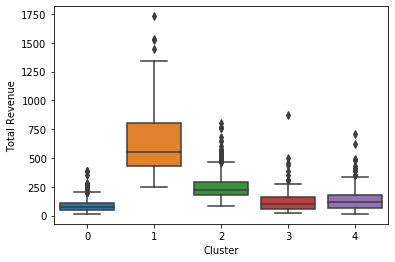

In [209]:
# Get a visual on the revenue characteristics of each cluster using revenue
sns.boxplot(x='Cluster', y='Total Revenue', data=all_customers)

## Cluster 1 - Highest Revenue and Most Number of Trips!

We start with this cluster since it looks like it's the money-making group! Also, it has the most number of returning customers.

In [210]:
# Function to help filter each group and compare to original dataframe
def cluster_filter(cluster):
    """
    Function to filter each cluster found in the kmeans model. To be used 
    after running 'examine_cluster' function.
    
    
    Returns
    -------
    A filtered dataframe of the original based on the cluster number.
    """
    # Filter out all customers in the cluster
    cluster_group = all_customers[all_customers.Cluster == cluster]
    # Set this group to a list
    cluster_group_addresses = list(cluster_group.index)
    # Filter the cleaned data with addresses using cluster list
    cluster_group_df = skier_zip[skier_zip['purchaser_address'].isin(cluster_group_addresses)]
    return cluster_group_df

In [211]:
# Look at where the customers in cluster 1 are from using function above
cluster_1_df = cluster_filter(1)

In [212]:
# Top cities in Cluster 1
cluster_1_df.purchaser_city.value_counts()[0:9]

Tolland         48
Madison         44
East Hampton    40
Darien          34
Brooklyn        33
Plantsville     33
Morgantown      28
Marlborough     23
New York        21
Name: purchaser_city, dtype: int64

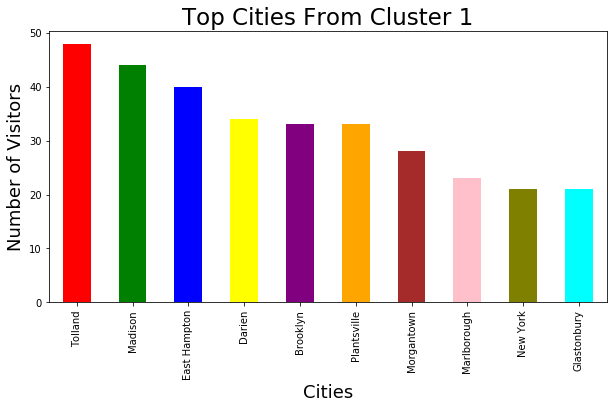

In [213]:
# Visual of top cities from cluster 1
cluster_1_df.purchaser_city.value_counts()[0:10].plot(kind='bar', 
                                                      color=my_colors, 
                                                      figsize=(10,5))
plt.xlabel("Cities", fontsize=18)
plt.ylabel("Number of Visitors",fontsize=18)
plt.title('Top Cities From Cluster 1', fontsize=23)
plt.show()

In [214]:
# Look again at this cluster based on the groupby() dataframe
all_customers[all_customers.Cluster == 1].head(10)

Number of Trips  Total Revenue  Mean Order Time  \
purchaser_address                                                          
1 Forge Ln                             2        1531.60         2.454545   
1 Glenn Street                         1         836.85         8.533333   
10 Alfred Drowne Rd                    3         430.49         2.000000   
10 Channing Rd.                        6         247.31         2.333333   
100 Chilson Rd                         4         781.01         5.315789   
101 Hillside Lane                      3         943.85         1.400000   
102 Sylvester Ave                      3         571.83        11.000000   
103 upper dummerston rd                4         358.91         2.428571   
104 West Mountain Road                 5         255.70         1.200000   
1108 Front Street                      3         393.27         8.833333   

                         Adult Tickets  Youth/Senior Tickets  Miles to Resort  \
purchaser_address                                                               
1 Forge Ln                         7.0                   4.0       165.689500   
1 Glenn Street                    15.0                   0.0        87.977946   
10 Alfred Drowne Rd                4.0                   6.0       125.238133   
10 Channing Rd.                    4.0                   5.0       145.724935   
100 Chilson Rd                     7.0                   9.0        74.260975   
101 Hillside Lane                  6.0                   4.0       128.494489   
102 Sylvester Ave                  4.0                   8.0        96.977232   
103 upper dummerston rd            7.0                   0.0        24.905703   
104 West Mountain Road             5.0                   0.0        92.271014   
1108 Front Street                 12.0                   0.0       224.143648   

                         Cluster  
purchaser_address                 
1 Forge Ln                     1  
1 Glenn Street                 1  
10 Alfred Drowne Rd            1  
10 Channing Rd.                1  
100 Chilson Rd                 1  
101 Hillside Lane              1  
102 Sylvester Ave              1  
103 upper dummerston rd        1  
104 West Mountain Road         1  
1108 Front Street              1

***Looks to me like this cluster contains the customers with the most number of trips and the highest total revenue. This cluster also includes at least one large group and possibly a number of medium sided groups which visited the resort. Nevertheless, the high number of adult tickets adds to the total revenue possibly as much as returning more often. These groups also contain some of the highest number of Youth/Senior tickets which could mean that these customers are coming as a family.***

## Cluster 3 - Furthest away

In [215]:
# Use function to filter and then look at top cities
cluster_3_df = cluster_filter(3)
cluster_3_df.purchaser_city.value_counts()[0:9]

Houston          14
Melbourne        12
San Francisco    12
Miami            10
Kailua            8
Venice            7
Weston            6
Los Angeles       6
Davenport         6
Name: purchaser_city, dtype: int64

In [216]:
# Trying to gain more insight on this cluster
cluster_3_df.describe()

order_id  purchaser_zip  net_rate_revenue  order_to_trip_days  \
count  2.830000e+02     283.000000        283.000000          283.000000   
mean   1.223955e+07   58748.466431         62.418481            6.014134   
std    1.160934e+06   26979.707012         36.769179            9.061638   
min    1.012301e+07     850.000000         14.870000            0.000000   
25%    1.131318e+07   33131.000000         41.840000            1.000000   
50%    1.219743e+07   59937.000000         54.860000            2.000000   
75%    1.331485e+07   84094.000000         70.670000            6.000000   
max    1.426480e+07   97759.000000        227.840000           52.000000   

                zip    latitude   longitude  Miles to Resort  
count    283.000000  283.000000  283.000000       283.000000  
mean   58748.466431   32.486219  -97.155512      1656.717137  
std    26979.707012    5.985341   18.823773       808.040963  
min      850.000000   17.760000 -157.730000        82.689234  
25%    33131.000000   28.070000 -113.780000      1132.572913  
50%    59937.000000   31.100000  -93.220000      1280.929489  
75%    84094.000000   37.205000  -81.400000      2064.999304  
max    97759.000000   48.440000  -64.820000      4981.738462

***This cluster has the highest average distance to resort, which includes possibly all of the outliers who traveled the farthest. Oddly, this cluster does not contain the greatest order to trip dates, meaning that these customers bought their tickets and decided to go with little preparation (an median average of only a couple days). I suppose there is no way of knowing if some of these people have relocated to major cities near the resort such as Boston, Philly, or New York and are just using their original home addresses or if they actually traveled via plane/car to visit the resort in under a few days.***

## Cluster 2 - Families?

In [217]:
# Run cluster function again
cluster_2_df = cluster_filter(2)
cluster_2_df.purchaser_city.value_counts()[0:9]

New York        137
Fairfield       115
Brooklyn         72
Madison          61
Somerville       47
Clinton          45
East Hampton     43
Old Lyme         39
Longmeadow       37
Name: purchaser_city, dtype: int64

In [218]:
# Put these cities on a map
cluster_2_map = folium.Map([41.7004, -73.9210], zoom_start=7, 
                         width=700, height=500)


icon = folium.features.CustomIcon('http://www.pngall.com/wp-content/uploads/2016/05/Skiing-PNG-HD.png',
                                  icon_size=(25,25))
folium.Marker([43.192778, -72.76],
              icon=icon, popup='Magic Mountain Resort',
              ).add_to(cluster_2_map)

# Old method is depreciated, use this now
zipArr_2 = cluster_2_df[['latitude', 'longitude']].values

# plot cluster
cluster_2_map.add_child(plugins.MarkerCluster(zipArr_2, radius=15))

cluster_2_map

In [219]:
# Use the groupby() df to view more of these customers
all_customers[all_customers.Cluster == 2].head(10)

Number of Trips  Total Revenue  Mean Order Time  \
purchaser_address                                                      
!4 Cedar Terrace                   2         282.68         2.000000   
1 Andrew Circle                    1         208.28         1.000000   
1 Astor Place                      2         153.43         2.333333   
1 Cowesit Ave.                     1         183.17         1.000000   
1 E. Welling Avenue                2         386.80         1.000000   
1 Edgehill Terrace                 2         219.44         1.000000   
1 Fore River Ave                   2         242.71         1.500000   
1 Montgomery Place                 2         318.91         7.000000   
1 Sackett Rd                       1         193.40         3.000000   
1 archer Place                     2         304.07         4.750000   

                     Adult Tickets  Youth/Senior Tickets  Miles to Resort  \
purchaser_address                                                           
!4 Cedar Terrace               4.0                   0.0       216.871422   
1 Andrew Circle                4.0                   0.0        95.481157   
1 Astor Place                  3.0                   0.0       181.393342   
1 Cowesit Ave.                 2.0                   2.0       105.089171   
1 E. Welling Avenue            4.0                   4.0       224.288367   
1 Edgehill Terrace             4.0                   0.0       124.690856   
1 Fore River Ave               0.0                   2.0       113.604179   
1 Montgomery Place             2.0                   6.0       171.296762   
1 Sackett Rd                   2.0                   2.0        88.686745   
1 archer Place                 2.0                   2.0       157.675331   

                     Cluster  
purchaser_address             
!4 Cedar Terrace           2  
1 Andrew Circle            2  
1 Astor Place              2  
1 Cowesit Ave.             2  
1 E. Welling Avenue        2  
1 Edgehill Terrace         2  
1 Fore River Ave           2  
1 Montgomery Place         2  
1 Sackett Rd               2  
1 archer Place             2

In [220]:
# Just what else can I learn about this cluster
cluster_2_df.describe()

order_id  purchaser_zip  net_rate_revenue  order_to_trip_days  \
count  4.885000e+03    4885.000000       4885.000000         4885.000000   
mean   1.229096e+07    7675.114432         55.335378            5.176663   
std    1.146272e+06    5167.595393         25.692428            7.341061   
min    1.010663e+07    1002.000000          1.860000            0.000000   
25%    1.137654e+07    4986.000000         39.980000            1.000000   
50%    1.218592e+07    6515.000000         49.280000            2.000000   
75%    1.340080e+07   10533.000000         61.370000            6.000000   
max    1.428547e+07   53226.000000        224.120000           93.000000   

                zip     latitude    longitude  Miles to Resort  
count   4885.000000  4885.000000  4885.000000      4885.000000  
mean    7675.114432    41.444514   -73.195458       143.419960  
std     5167.595393     1.109865     1.533591        81.587331  
min     1002.000000    34.690000   -88.040000         5.016480  
25%     4986.000000    40.870000   -73.960000        98.492970  
50%     6515.000000    41.350000   -73.110000       132.997252  
75%    10533.000000    42.180000   -72.400000       174.028072  
max    53226.000000    44.900000   -69.270000       893.462940

***Cluster 2 is the second largest group, with the second largest revenue, and the second largest number of Youth/Senior tickets. I am calling this the family group since it seems like the majority of the customers bought some combination of tickets. This group probably live within a few hour drive of the resort and the majority purchase their tickets only a couple days in advance.***

## Cluster 0 - One Time Visitors (The largest group!)

In [221]:
# The largest cluster, by city
cluster_0_df = cluster_filter(0)
cluster_0_df.purchaser_city.value_counts()

New York          224
Brooklyn          179
Boston             90
West Hartford      74
Fairfield          73
                 ... 
Lindenhurst         1
Woodcliff Lake      1
Wernersville        1
Fly Creek           1
Carlisle            1
Name: purchaser_city, Length: 1311, dtype: int64

In [222]:
# This cluster seems all over the place!
cluster_0_df.describe()

order_id  purchaser_zip  net_rate_revenue  order_to_trip_days  \
count  7.056000e+03    7056.000000       7056.000000         7056.000000   
mean   1.228000e+07    7788.516865         51.362372            3.938209   
std    1.177549e+06    6159.767410         23.212095            5.450207   
min    1.012301e+07    1001.000000         14.870000            0.000000   
25%    1.135612e+07    3257.000000         39.050000            1.000000   
50%    1.217524e+07    6484.000000         50.210000            2.000000   
75%    1.341704e+07   10804.000000         58.580000            4.000000   
max    1.428648e+07   61350.000000        261.320000           61.000000   

                zip     latitude    longitude  Miles to Resort  
count   7056.000000  7056.000000  7056.000000      7056.000000  
mean    7788.516865    41.624843   -73.262265       137.683485  
std     6159.767410     1.127055     1.879333        93.982635  
min     1001.000000    33.550000   -89.420000         2.982793  
25%     3257.000000    40.880000   -73.970000        89.176511  
50%     6484.000000    41.610000   -73.070000       123.676975  
75%    10804.000000    42.370000   -72.340000       174.028072  
max    61350.000000    45.430000   -68.730000       881.917911

***Cluster 0 is the largest group. The majority of these people have only visited the mountain one time. How can we get these people to come back? How can we get these customers to go from cluster 0 to cluster 1 (the money-making group that returns with larger groups and families)?***

## Cluster 4 - The Planners!

In [223]:
# What makes these people different
cluster_4_df = cluster_filter(4)
cluster_4_df.purchaser_city.value_counts()

Brooklyn        17
New York        10
Bristol          9
South Orange     9
Andover          9
                ..
Dobbs Ferry      1
Millis           1
Birmingham       1
Montrose         1
Chepachet        1
Name: purchaser_city, Length: 146, dtype: int64

In [224]:
# Is there a reason they bought tickets so early?
all_customers[all_customers.Cluster == 4].head(10)

Number of Trips  Total Revenue  Mean Order Time  \
purchaser_address                                                              
1 Consulate Drive                          1         139.48            107.0   
10 Artillery Lane                          1          45.56             72.0   
10 wildwood street                         2         180.38             97.5   
100 Salem St, Suite 5                      1         128.31             68.0   
101 W Cross St, #636                       1         150.64             84.0   
1013 47TH AVE 3F                           1          22.32            104.0   
104 taggert dr                             1          23.25             87.0   
106 East 85th Street Apt 2N                1         134.84             52.0   
11 Retrop Road                             1          66.01             39.0   
112 Raymond Avenue                         1         709.53             63.0   

                             Adult Tickets  Youth/Senior Tickets  \
purchaser_address                                                  
1 Consulate Drive                      2.0                   0.0   
10 Artillery Lane                      1.0                   0.0   
10 wildwood street                     2.0                   4.0   
100 Salem St, Suite 5                  3.0                   0.0   
101 W Cross St, #636                   2.0                   0.0   
1013 47TH AVE 3F                       1.0                   0.0   
104 taggert dr                         0.0                   1.0   
106 East 85th Street Apt 2N            2.0                   1.0   
11 Retrop Road                         0.0                   2.0   
112 Raymond Avenue                     3.0                   3.0   

                             Miles to Resort  Cluster  
purchaser_address                                      
1 Consulate Drive                 163.454174        4  
10 Artillery Lane                 180.388871        4  
10 wildwood street                 96.977232        4  
100 Salem St, Suite 5             103.424128        4  
101 W Cross St, #636              337.134409        4  
1013 47TH AVE 3F                  179.685850        4  
104 taggert dr                    212.092712        4  
106 East 85th Street Apt 2N       177.434509        4  
11 Retrop Road                     95.481157        4  
112 Raymond Avenue                186.073430        4

***This final cluster has the highest mean order to trip date. Meaning that this group of customers are planning to visit the mountain much further in advance than the other groups - even further in advance than groups of people with addresses considerably farther away. For that reason I'm calling them the 'planners'. For whatever reason they have decided they are going skiing on average two months before their trip date - and about two months before most people decide to buy tickets. Perhaps they have very set vacation schedules or limited time off. Either way, they aren't necessarily bringing large groups to the mountain (a mean around 2 people) and their distance to the resort doesn't seem to be that much further than the majority (200 miles - probably close to 4 hours away)***

# Summary

Skiers further away tended to buy their tickets more in advance (having a higher 'order mean') but not exclusively - in fact the data showed there was a group of people who just tend to plan more in advance (Furthermore, some skiers may be using a non-local home address when they in fact live in a nearby city or town). 

The two clusters with the most people were the skiers who lived the closest to the mountain - within approximately two hours. And obviously the group with the highest ticket revenue were those with the most adult ticket purchases (since adult tickets cost more than youth/senior). But it was the skiers in the cluster who returned more than once or bought multiple tickets that affected the revenue the most.

I was really only able to use data from the Magic website for my conclusions. Without address information (or unique identifiers) from the Liftopia.com website it was difficult to include these customers into the dataset since I needed zip code information to plot where skiers were from, how far they traveled, and the regions that show the most customers.

# Future Recommendations

Include data from Day-Ticket and Season Pass Holders if possible. 

Plus, any information about summer and off-season visitors might have some valuable data to explore - I know lots of successful resorts are turning to year-round activities to offset the decline in ski season numbers.

I would also like to split up the Youth/Senior section and look more specifically at age. Unfortunately most of the data didn't include birth dates but it would be interesting to separate kids from seniors purely to look at the numbers.

### Google Distance API
For about 100 dollars I could accurately calculate the driving distance for each customer ($5 per 1000 customers or rows). While I'm not sure if this would change my distance numbers significantly, it would certainly be a more accurate statistic.
https://developers.google.com/maps/documentation/distance-matrix/usage-and-billing

### United States Zip Code Demographic
For about 200 dollars I could include much more specific demographic information for each zip code in my dataset - including income and education levels, home and rental costs, specific age and gender stats as well as all population numbers. 
https://www.unitedstateszipcodes.org/zip-code-database/

![](https://raw.githubusercontent.com/twhipple/dsc-capstone-project-v2-online-ds-pt-090919/master/Final_Notebook_files/ski-lift-1434757.jpg)